In [1]:
import sys
sys.path.append("..")

from TwinNeuralNetworkNearestNeighbors import TNNR_NN

import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

import gc

In [2]:
def_func = lambda a: lambda x: x**3 - a*x

In [3]:
# Set the font size for x tick labels
plt.rc('xtick', labelsize=15)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=15)

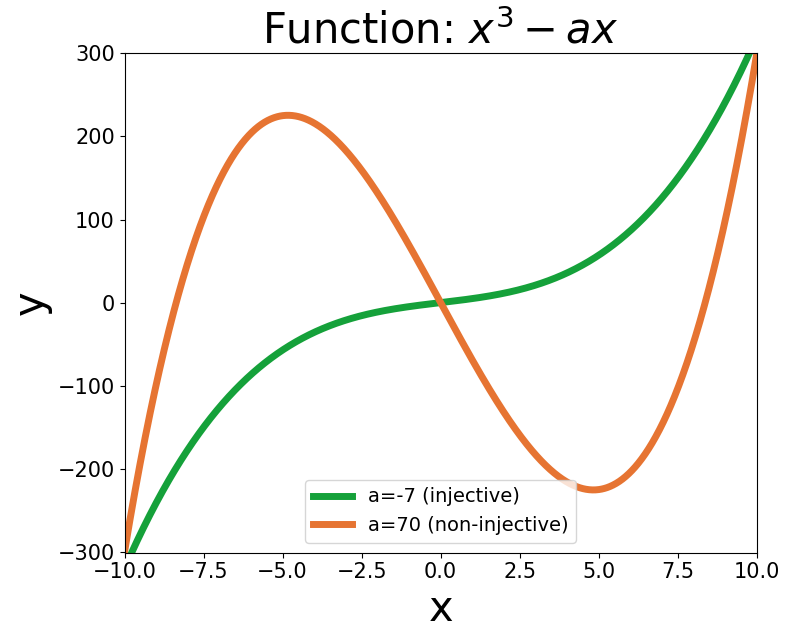

In [4]:
xs_injective = np.arange(-10, 10, 0.01)
ys_injective = np.array([def_func(-7)(x*0.65) for x in xs_injective]).flatten()

plt.plot(xs_injective, ys_injective, label='a=-7 (injective)', c='#15a13a', linewidth=5)


xs_noninjec = np.arange(-10, 10, 0.01)
ys_noninjec = np.array([def_func(70)(x) for x in xs_noninjec]).flatten()

plt.plot(xs_noninjec, ys_noninjec, label='a=70 (non-injective)', c='#e67432', linewidth=5)



plt.xlim([-10, 10])
plt.ylim([-301, 301])
plt.title('Function: $x^3 - ax$', fontsize = 30)
plt.xlabel('x', fontsize = 30)
plt.ylabel('y', fontsize = 30)
plt.legend(fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
#plt.savefig('example1.pdf')
plt.savefig('example1.png', dpi=1200)

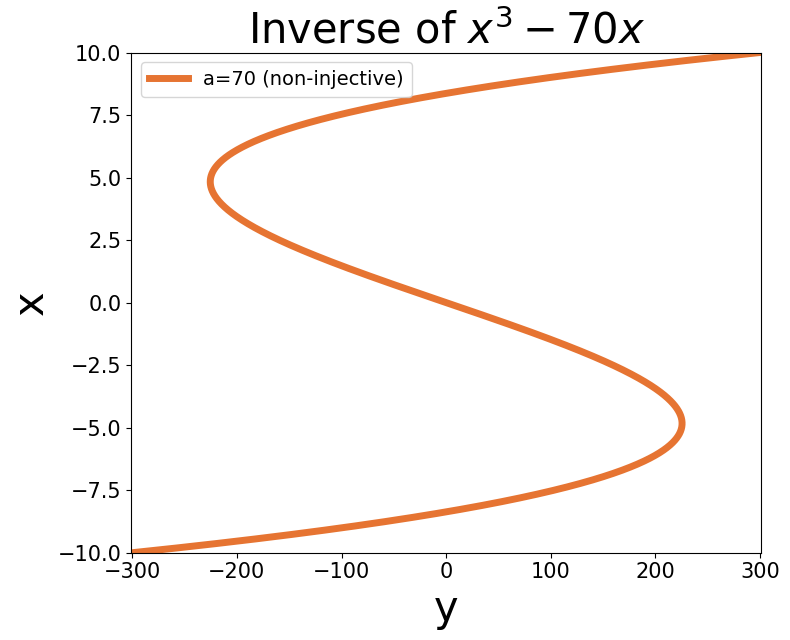

In [5]:
xs_noninjec = np.arange(-10, 10, 0.01)
ys_noninjec = np.array([def_func(70)(x) for x in xs_noninjec]).flatten()

plt.plot(ys_noninjec, xs_noninjec, label='a=70 (non-injective)', c='#e67432', linewidth=5)


plt.ylim([-10, 10])
plt.xlim([-301, 301])
plt.title('Inverse of $x^3 - 70x$', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
#plt.savefig('example2.pdf')
plt.savefig('example2.png', dpi=1200)

In [4]:
n = 2100
seed = 23497#19876

a = 70

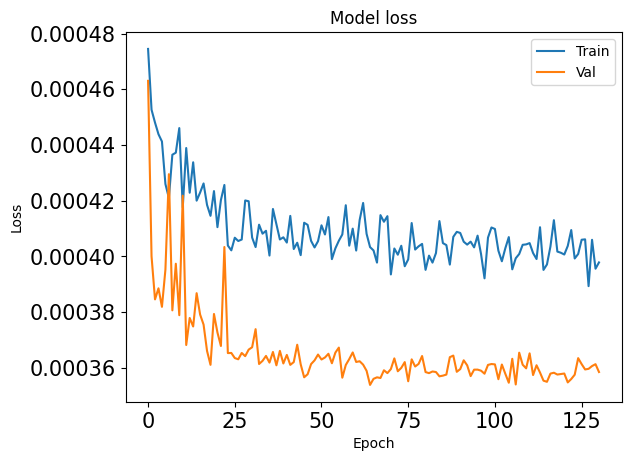

Test RMSE (plain):                                7.206569921713704
Test RMSE (back to y-space):                      7.616092881088107
Test RMSE (min among clusters):                   4.871153643771158
Test RMSE (transformed back):                     7.206569921713704
Test RMSE (min among clusters, transformed back): 4.871153643771158
CPU times: user 22min 16s, sys: 19min 18s, total: 41min 34s
Wall time: 5min 31s


In [9]:
%%time

tnnr_nn_test_64_plots = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_plots_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=50,
                                num_nn_test=5,
                                radius_nn_predict=0.01,
                                radius_sub_nn_predict=0.005,
                                noise_normal_y=(0, 5))

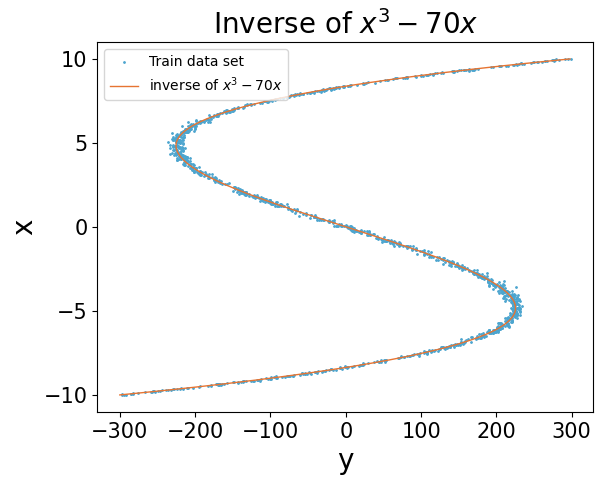

In [10]:
plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=1, c='#4ca5cf')

plt.plot(ys_noninjec, xs_noninjec, label='inverse of $x^3 - 70x$', c='#e67432', linewidth=1)

#plt.xlim([-10, 10])
#plt.ylim([-301, 301])
plt.title('Inverse of $x^3 - 70x$', fontsize = 20)
plt.xlabel('y', fontsize = 20)
plt.ylabel('x', fontsize = 20)
plt.legend()

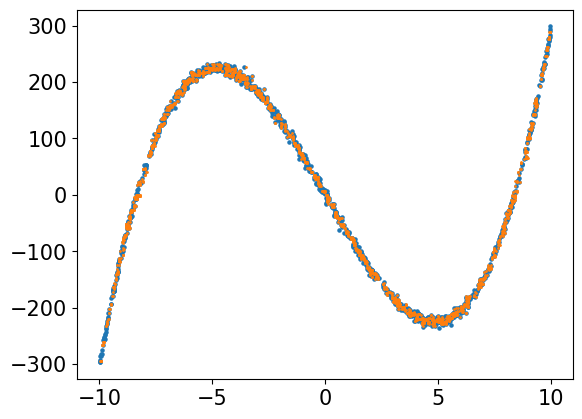

In [11]:
plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            label='Train data set', s=5)
plt.scatter(tnnr_nn_test_64_plots.x_pred_test,
            tnnr_nn_test_64_plots.y_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=1)

In [12]:
from sklearn.neighbors import NearestNeighbors

def get_nearest_neighbors(x_new, x_reference, num_neighbors):
    neighbor_finder = NearestNeighbors(n_neighbors=num_neighbors)
    neighbor_finder.fit(x_reference)
    return neighbor_finder.kneighbors(x_new, return_distance=False)

def get_nearest_neighbors_radius(x_new, x_reference, radius_neighbors):
    neighbor_finder = NearestNeighbors(radius=radius_neighbors)
    neighbor_finder.fit(x_reference)
    return neighbor_finder.radius_neighbors(x_new, return_distance=False)

In [13]:
y_news = tnnr_nn_test_64_plots.y_test_single
y_nn_indexes = get_nearest_neighbors(y_news.reshape(-1, 1), tnnr_nn_test_64_plots.y_train_single.reshape(-1, 1), 10)

In [14]:
y_news

array([-0.61979606, -0.71295683,  0.31978931,  0.61749215, -0.73198045,
        0.7110051 ,  0.74221722,  0.32796324,  0.34541004,  0.70589713,
        0.4560965 , -0.7288663 ,  0.65915718, -0.71929894, -0.4550081 ,
        0.29886511,  0.74127926, -0.7387933 , -0.73768621,  0.27116509,
        0.71166374,  0.09691526, -0.7730313 , -0.69561899, -0.21205911,
       -0.43367411,  0.34827177, -0.59334687,  0.64276316, -0.69412011,
        0.44149539,  0.54706045,  0.6370789 ,  0.09624187, -0.25299243,
        0.85610179,  0.14549923, -0.51849219,  0.93389932, -0.68781619,
        0.12364741, -0.02840946, -0.14109639,  0.77254504, -0.72078146,
        0.50084239, -0.41732948, -0.14057689,  0.72419667, -0.18726041,
       -0.40936747,  0.75151787,  0.62861336, -0.50221572, -0.39301555,
       -0.73002755, -0.11927499,  0.70043757, -0.33475669, -0.56484279,
        0.24536961, -0.04374802, -0.01286661,  0.74808205, -0.51371839,
       -0.28287472, -0.37964807, -0.21399705,  0.70815274, -0.78

In [15]:
y_nn_indexes

array([[ 344,  656,   76, ...,  604,  403, 1076],
       [1087, 1157, 1225, ..., 1226,  484, 1088],
       [ 657,  832,  610, ..., 1012,  715,  860],
       ...,
       [ 483, 1099,  805, ..., 1195,  517,  178],
       [ 700,  928,  153, ...,  195,  103,  780],
       [ 276, 1119,  596, ...,  921,  986,  893]])

In [16]:
# for y_new in (range(len(y_news))):
y_new_index = 0

In [17]:
tnnr_nn_test_64_plots.y_train_single[y_nn_indexes[y_new_index]]

array([-0.6209848 , -0.6213139 , -0.61765189, -0.61745456, -0.61690088,
       -0.62332843, -0.62390052, -0.62396032, -0.61527833, -0.6259306 ])

In [18]:
tnnr_nn_test_64_plots.y_train_single.shape

(1260,)

In [19]:
tnnr_nn_test_64_plots.x_train_single.shape

(1260, 1)

In [20]:
y_nn = tnnr_nn_test_64_plots.y_train_single[y_nn_indexes[y_new_index]]
y_nn

array([-0.6209848 , -0.6213139 , -0.61765189, -0.61745456, -0.61690088,
       -0.62332843, -0.62390052, -0.62396032, -0.61527833, -0.6259306 ])

In [21]:
x_nn = tnnr_nn_test_64_plots.x_train_single[y_nn_indexes[y_new_index]]
x_nn

array([[ 0.66178995],
       [ 0.63322719],
       [ 0.65122568],
       [ 0.66146737],
       [-0.91681612],
       [ 0.64255281],
       [ 0.67195683],
       [ 0.3031972 ],
       [-0.91252474],
       [ 0.32352494]])

In [22]:
tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_news[0])

-179.9806268179404

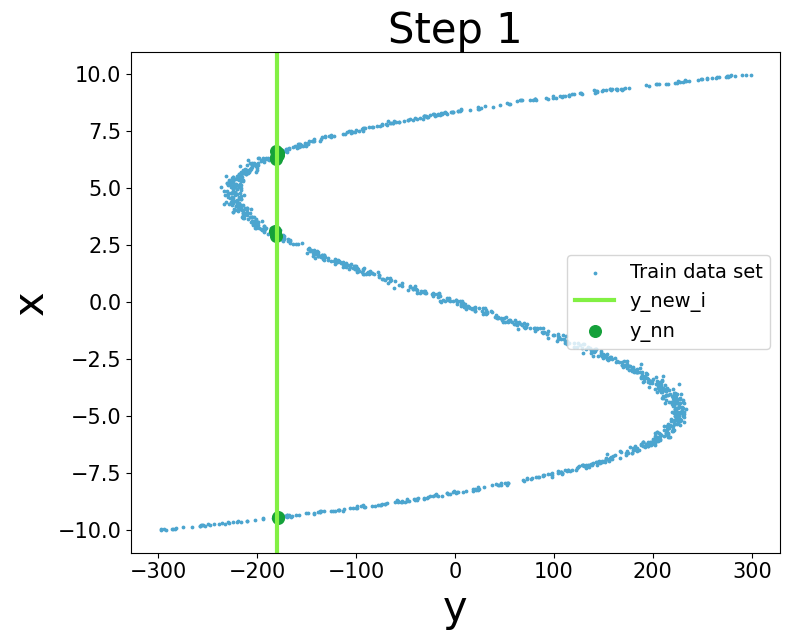

In [23]:
plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=3, c='#4ca5cf')

plt.axvline(x=tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_news[0]), 
            color='#82f043', label='y_new_i', lw=3)

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=70, c='#15a13a')


plt.title('Step 1', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='center right', fontsize=14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('step1.pdf')

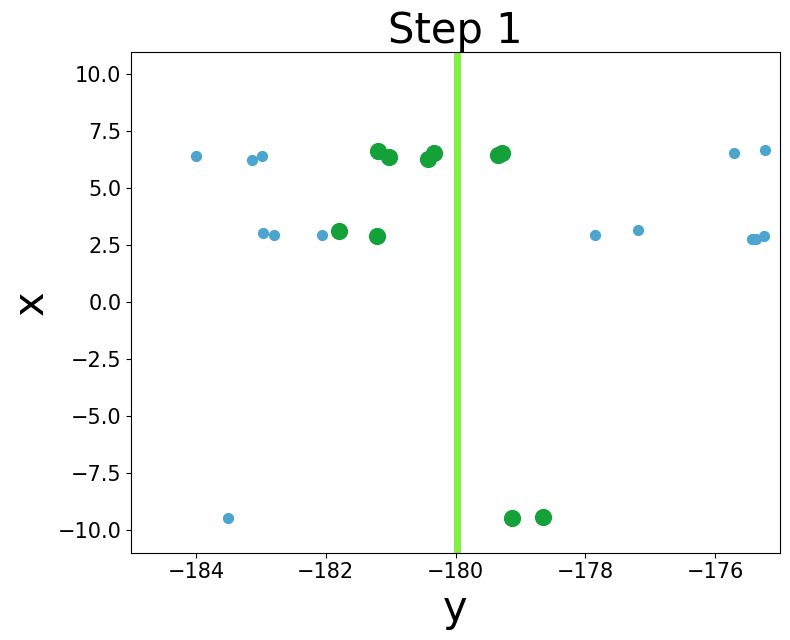

In [24]:
plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=50, c='#4ca5cf')

plt.axvline(x=tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_news[0]), 
            color='#82f043', label='y_new_i', lw=5)

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=130, c='#15a13a')


plt.xlim([-185, -175])
plt.title('Step 1', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
#plt.legend(loc='lower left')

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('step1-2.pdf')

In [25]:
# for i in range(len(y_nn)):
i = 0

In [26]:
y_nn[i]

-0.6209848007971274

In [27]:
x_nn[i]

array([0.66178995])

In [28]:
x_nni_nn_indexes = get_nearest_neighbors_radius(x_nn[i].reshape(-1, 1), 
                                                tnnr_nn_test_64_plots.x_train_single, 
                                                0.02)
x_nni_nn_indexes

array([array([ 257,  897,   76,  548,   95,  829,  344,  399,  299,  162,  659,
              1153, 1079, 1089,  874,  671])                                   ],
      dtype=object)

In [29]:
x_nni_nn = tnnr_nn_test_64_plots.x_train_single[x_nni_nn_indexes[0]]
x_nni_nn

array([[0.64688882],
       [0.64255281],
       [0.65122568],
       [0.65050298],
       [0.66146737],
       [0.66139464],
       [0.66178995],
       [0.66705263],
       [0.67271746],
       [0.67195683],
       [0.66848246],
       [0.66886947],
       [0.67509207],
       [0.67913638],
       [0.68053668],
       [0.67764422]])

In [30]:
y_nni_nn = tnnr_nn_test_64_plots.y_train_single[x_nni_nn_indexes[0]]
y_nni_nn

array([-0.62994506, -0.62332843, -0.61765189, -0.63341639, -0.61745456,
       -0.60531792, -0.6209848 , -0.58423987, -0.60371023, -0.62390052,
       -0.58890399, -0.59339456, -0.58704453, -0.5862146 , -0.5892168 ,
       -0.57980882])

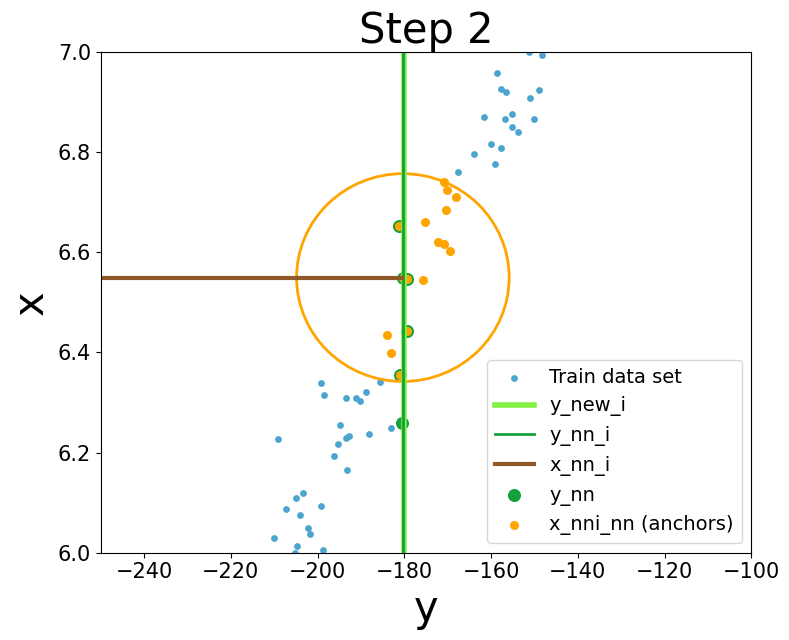

In [31]:
from matplotlib.patches import Ellipse


plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=15, c='#4ca5cf')

plt.axvline(x=tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_news[0]), 
            color='#82f043', label='y_new_i', lw=4)

plt.axvline(x=tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]), 
            color='#15a13a', label='y_nn_i', lw=2)

plt.axhline(y=tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i]), 
            xmin=0,
            xmax=-1*tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i])/390,
            color='#8f5927',
            label='x_nn_i', lw=3)

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=70, c='#15a13a')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn),
            label='x_nni_nn (anchors)', s=30, c='orange')

elipse1 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i])), 
    49, 0.415, 
    color='orange', lw=2,
    fill=False)

plt.gca().add_patch(elipse1)

plt.xlim([-250, -100])
plt.ylim([6, 7])
plt.title('Step 2', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='lower right', fontsize=14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('step2.pdf')

In [32]:
#j_random = np.random.randint(len(x_nni_nn))
j_random = 10

In [33]:
tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random])

array([6.61735255])

In [34]:
tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random])

-170.85192125007524

In [35]:
x_nni_nn[j_random]

array([0.66848246])

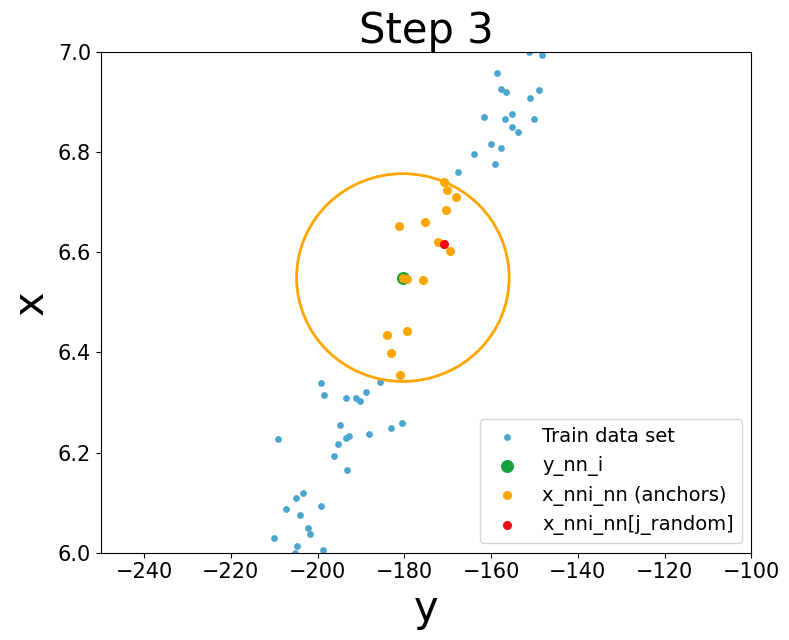

In [36]:
from matplotlib.patches import Ellipse


plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=15, c='#4ca5cf')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i]),
            label='y_nn_i', s=70, c='#15a13a')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn),
            label='x_nni_nn (anchors)', s=30, c='orange')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random]),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random]),
            label='x_nni_nn[j_random]', s=30, c='#f00c10')

elipse1 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i])), 
    49, 0.415, 
    color='orange', lw=2,
    fill=False)

elipse2 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random])), 
    30, 0.3, 
    color='#f00c10', lw=2,
    fill=False)

plt.gca().add_patch(elipse1)
#plt.gca().add_patch(elipse2)

plt.xlim([-250, -100])
plt.ylim([6, 7])
plt.title('Step 3', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='lower right', fontsize=14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('step3.pdf')

In [37]:
x_nni_nnj_nn_indexes = get_nearest_neighbors_radius(x_nni_nn[j_random].reshape(-1, 1), 
                                                    x_nni_nn,
                                                    0.01)

x_nni_nnj_nn_indexes

array([array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 15])], dtype=object)

In [38]:
x_nni_nnj_nn = x_nni_nn[x_nni_nnj_nn_indexes[0]]
x_nni_nnj_nn

array([[0.66146737],
       [0.66139464],
       [0.66178995],
       [0.66705263],
       [0.67271746],
       [0.67195683],
       [0.66848246],
       [0.66886947],
       [0.67509207],
       [0.67764422]])

In [39]:
y_nni_nnj_nn = y_nni_nn[x_nni_nnj_nn_indexes[0]]
y_nni_nnj_nn

array([-0.61745456, -0.60531792, -0.6209848 , -0.58423987, -0.60371023,
       -0.62390052, -0.58890399, -0.59339456, -0.58704453, -0.57980882])

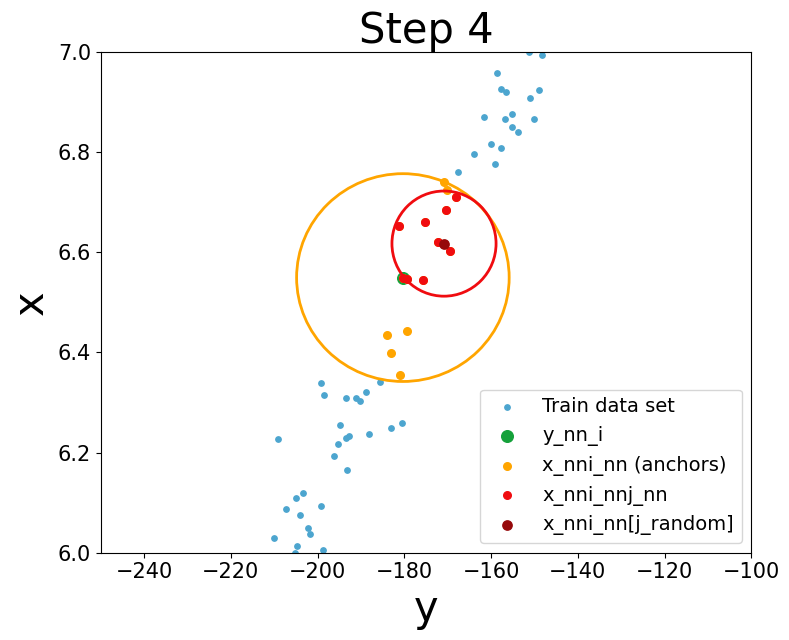

In [40]:
from matplotlib.patches import Ellipse


plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=15, c='#4ca5cf')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i]),
            label='y_nn_i', s=70, c='#15a13a')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn),
            label='x_nni_nn (anchors)', s=30, c='orange')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nnj_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nnj_nn),
            label='x_nni_nnj_nn', s=30, c='#f00c10')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random]),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random]),
            label='x_nni_nn[j_random]', s=45, c='#96090b')

elipse1 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i])), 
    49, 0.415, 
    color='orange', lw=2,
    fill=False)

elipse2 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random])), 
    24, 0.21, 
    color='#f00c10', lw=2,
    fill=False)

plt.gca().add_patch(elipse1)
plt.gca().add_patch(elipse2)

plt.xlim([-250, -100])
plt.ylim([6, 7])
plt.title('Step 4', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('step4.pdf')

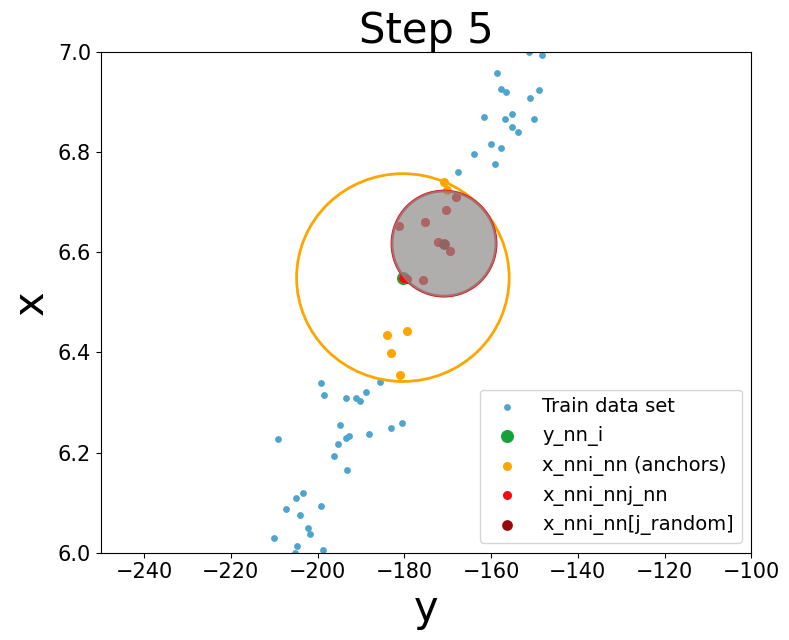

In [41]:
from matplotlib.patches import Ellipse


plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=15, c='#4ca5cf')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i]),
            label='y_nn_i', s=70, c='#15a13a')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn),
            label='x_nni_nn (anchors)', s=30, c='orange')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nnj_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nnj_nn),
            label='x_nni_nnj_nn', s=30, c='#f00c10')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random]),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random]),
            label='x_nni_nn[j_random]', s=45, c='#96090b')

elipse1 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i])), 
    49, 0.415, 
    color='orange', lw=2,
    fill=False)

elipse2 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random])), 
    24, 0.21, 
    color='#f00c10', lw=2,
    fill=False)

elipse3 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn[j_random]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn[j_random])), 
    24, 0.21, 
    color='#8f8b8b')
elipse3.set_alpha(0.7)

plt.gca().add_patch(elipse1)
plt.gca().add_patch(elipse2)
plt.gca().add_patch(elipse3)

plt.xlim([-250, -100])
plt.ylim([6, 7])
plt.title('Step 5', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('step5.pdf')

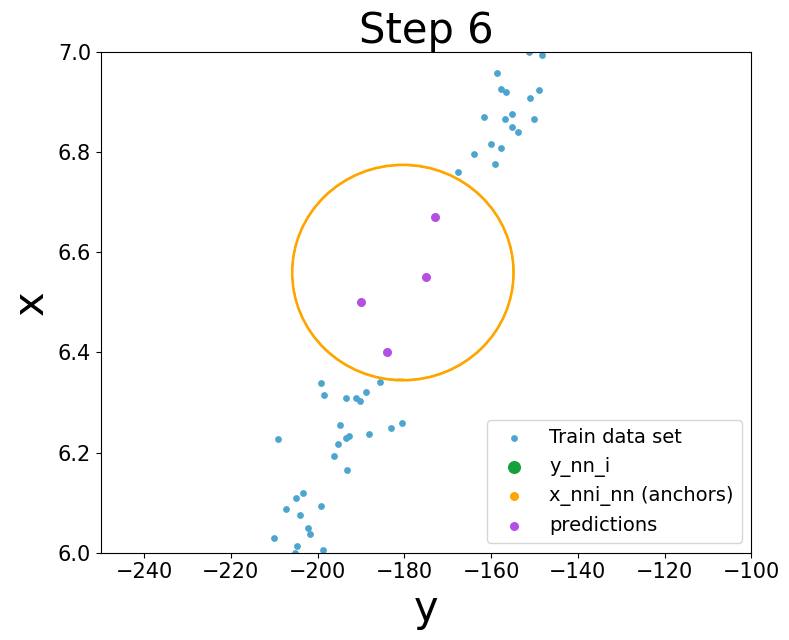

In [42]:
from matplotlib.patches import Ellipse


plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(tnnr_nn_test_64_plots.y_train_single),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(tnnr_nn_test_64_plots.x_train_single),
            label='Train data set', s=15, c='#4ca5cf')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i]),
            label='y_nn_i', s=70, c='#15a13a')

plt.scatter(tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nni_nn),
            label='x_nni_nn (anchors)', s=30, c='orange')


elipse1 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i])+0.01), 
    51, 0.43, 
    color='orange', lw=2,
    fill=False)

elipse2 = Ellipse(
    (tnnr_nn_test_64_plots.cn_transformer.inverse_transform_y(y_nn[i]), 
     tnnr_nn_test_64_plots.cn_transformer.inverse_transform_x(x_nn[i])+0.01), 
    50, 0.42, 
    color='white',
    fill=True)
elipse2.set_alpha(1)

plt.gca().add_patch(elipse1)
plt.gca().add_patch(elipse2)

plt.scatter([-190, -175, -184, -173],
            [6.5, 6.55, 6.4, 6.67],
            label='predictions', s=30, c='#b44fe3')


plt.xlim([-250, -100])
plt.ylim([6, 7])
plt.title('Step 6', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='lower right', fontsize = 14)

#plt.savefig('step6.png', dpi=600)
#plt.tight_layout()
#plt.savefig('step6.pdf')
plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
#plt.savefig('step6.png', dpi=1200)
plt.savefig('step6.pdf')

# Ejemplo

## No noise

### Solo TNNR

In [5]:
from TwinNeuralNetwork import TNNR, ANNR

In [6]:
seed = 93485

In [45]:
def_func_stretch = lambda a: lambda x: (x*0.65)**3 - a*(x*0.65)

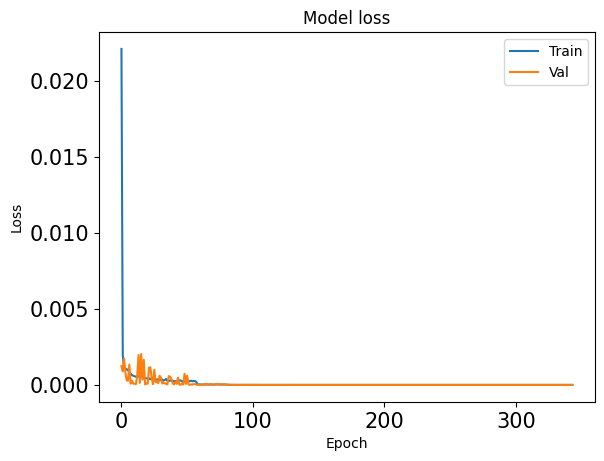

Test RMSE (plain):           0.00536592454122182
Test RMSE (back to y-space): 0.4102165353395119
CPU times: user 7min 36s, sys: 1min 17s, total: 8min 54s
Wall time: 6min 2s


In [46]:
%%time

tnnr_test_64_bij = TNNR(def_func_stretch(-7), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                        show_summary=False, show_loss_plot=True, show_rmse=True, 
                        mdl_wts_file='weights/tnnr_test_64_n' + str(n) + '_inverse_a' + str(a))

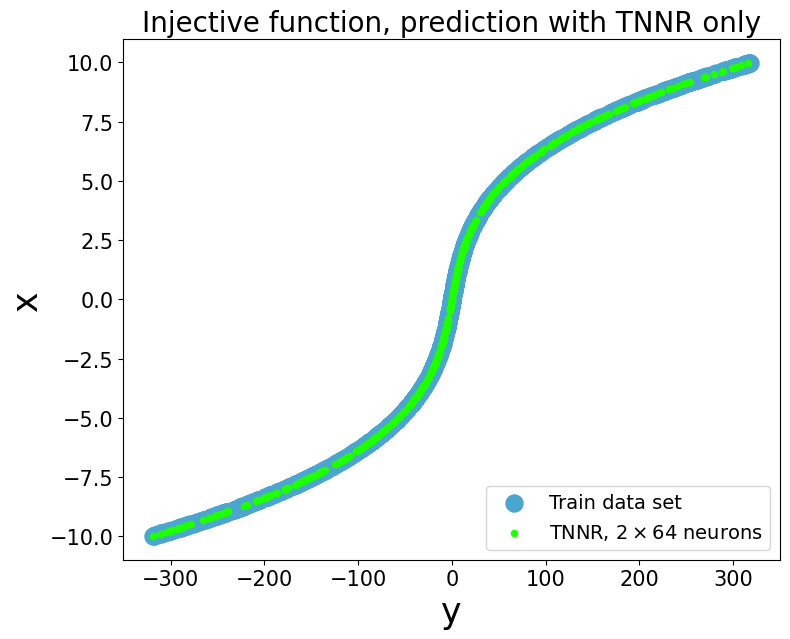

In [47]:
#plt.scatter(tnnr_test_64_bij.cn_transformer.inverse_transform_x(tnnr_test_64_bij.x_train_single),
#            tnnr_test_64_bij.cn_transformer.inverse_transform_y(tnnr_test_64_bij.y_train_single),
#            label='Train data set', s=150, c='#4ca5cf')
#plt.scatter(tnnr_test_64_bij.x_pred_test,
#            tnnr_test_64_bij.cn_transformer.inverse_transform_y(tnnr_test_64_bij.y_test_single),
#            label='TNNR, $2\\times 64$ neurons', s=20, c='#1eff00')

plt.scatter(tnnr_test_64_bij.cn_transformer.inverse_transform_y(tnnr_test_64_bij.y_train_single),
            tnnr_test_64_bij.cn_transformer.inverse_transform_x(tnnr_test_64_bij.x_train_single),
            label='Train data set', s=150, c='#4ca5cf')
plt.scatter(tnnr_test_64_bij.cn_transformer.inverse_transform_y(tnnr_test_64_bij.y_test_single),
            tnnr_test_64_bij.x_pred_test,
            label='TNNR, $2\\times 64$ neurons', s=20, c='#1eff00')

#plt.xlim([-10.5, 10.5])
plt.title('Injective function, prediction with TNNR only', fontsize = 20)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-only-no-noise-bijective.pdf')

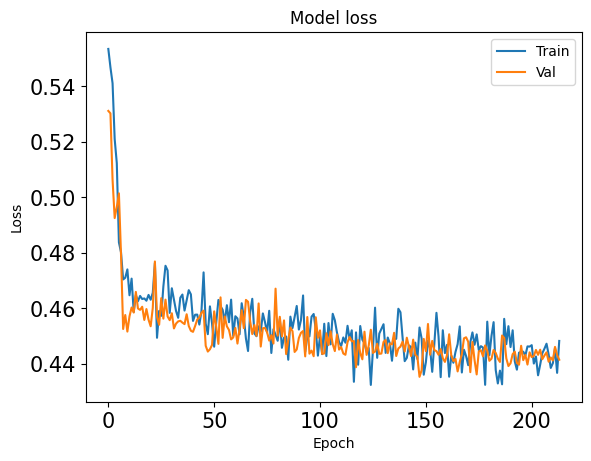

Test RMSE (plain):           4.775374664840942
Test RMSE (back to y-space): 10.635149654716118
CPU times: user 4min 54s, sys: 52.7 s, total: 5min 47s
Wall time: 3min 54s


In [10]:
%%time

tnnr_test_64 = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                    show_summary=False, show_loss_plot=True, show_rmse=True, 
                    mdl_wts_file='weights/tnnr_test_64_n' + str(n) + '_inverse_a' + str(a))

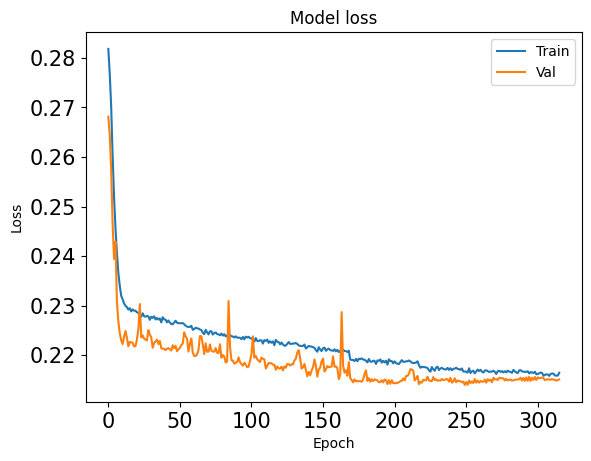

Test RMSE (inverse problem): 34.76606212951146
CPU times: user 5min 50s, sys: 55.8 s, total: 6min 45s
Wall time: 4min 33s


In [8]:
%%time

annr_test_64 = ANNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                    show_summary=False, show_loss_plot=True, show_rmse=True, 
                    mdl_wts_file='weights/annr_test_64_n' + str(n) + '_inverse_a' + str(a))

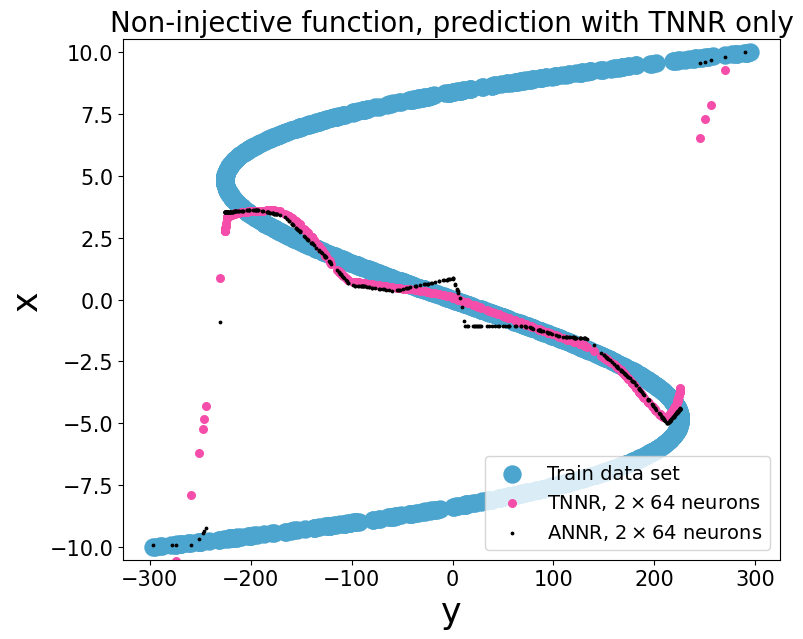

In [11]:
#plt.scatter(tnnr_test_64.cn_transformer.inverse_transform_x(tnnr_test_64.x_train_single),
#            tnnr_test_64.cn_transformer.inverse_transform_y(tnnr_test_64.y_train_single),
#            label='Train data set', s=150, c='#4ca5cf')
#plt.scatter(tnnr_test_64.x_pred_test,
#            tnnr_test_64.cn_transformer.inverse_transform_y(tnnr_test_64.y_test_single),
#            label='TNNR, $2\\times 64$ neurons', s=30, c='#f54eaa')

plt.scatter(tnnr_test_64.cn_transformer.inverse_transform_y(tnnr_test_64.y_train_single),
            tnnr_test_64.cn_transformer.inverse_transform_x(tnnr_test_64.x_train_single),
            label='Train data set', s=150, c='#4ca5cf')
plt.scatter(tnnr_test_64.cn_transformer.inverse_transform_y(tnnr_test_64.y_test_single),
            tnnr_test_64.x_pred_test,
            label='TNNR, $2\\times 64$ neurons', s=30, c='#f54eaa')
plt.scatter(annr_test_64.cn_transformer.inverse_transform_y(annr_test_64.y_test_single),
            annr_test_64.x_pred_test,
            label='ANNR, $2\\times 64$ neurons', s=3, c='black')

plt.ylim([-10.5, 10.5])
plt.title('Non-injective function, prediction with TNNR only', fontsize = 20)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-only-no-noise.pdf')

### Primera version de TNNR NN (solo en y-space)

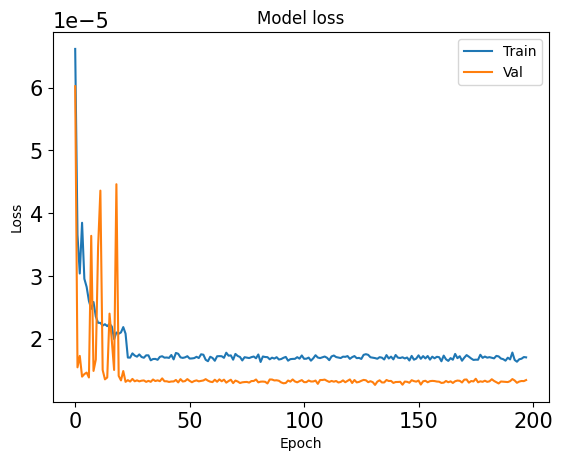

Test RMSE (plain):              5.31164583621614
Test RMSE (back to y-space):    117.18527592268573
CPU times: user 4min 19s, sys: 42.9 s, total: 5min 2s
Wall time: 3min 25s


In [54]:
%%time

tnnr_nn_test_64_no_nn = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=10,
                                num_nn_test=3,
                                no_use_nn=True)

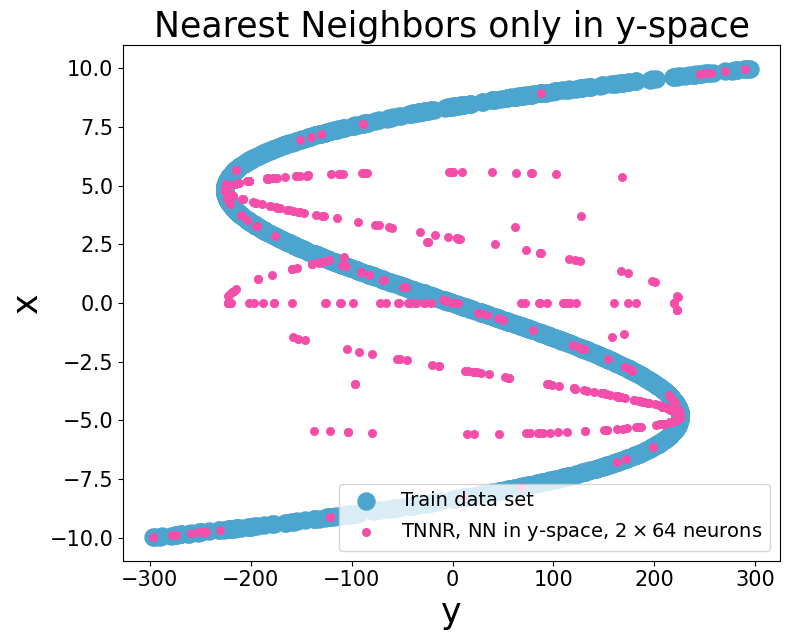

In [55]:
#plt.scatter(tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn.x_train_single),
#            tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_train_single),
#            label='Train data set', s=10, c='#4ca5cf')
#plt.scatter(tnnr_nn_test_64_no_nn.x_pred_test,
#            tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_test_single),
#            label='TNNR, NN in y-space, $2\\times 64$ neurons', s=5, c='#f54eaa')

plt.scatter(tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_train_single),
            tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn.x_train_single),
            label='Train data set', s=150, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_test_single),
            tnnr_nn_test_64_no_nn.x_pred_test,
            label='TNNR, NN in y-space, $2\\times 64$ neurons', s=30, c='#f54eaa')

plt.title('Nearest Neighbors only in y-space', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('no-nn-no-noise.pdf')

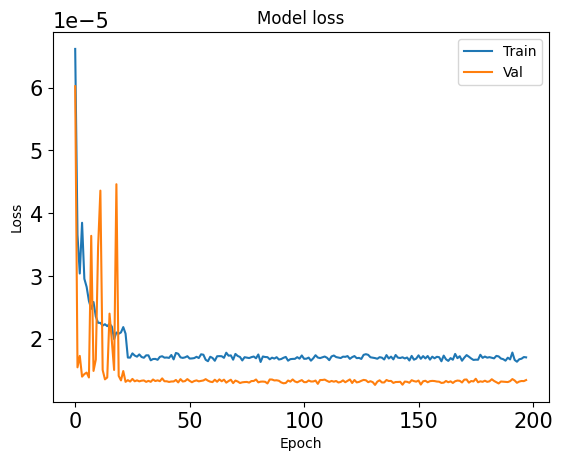

Test RMSE (plain):              6.440469329035184
Test RMSE (back to y-space):    0.3269218022842014
CPU times: user 4min 20s, sys: 42.5 s, total: 5min 2s
Wall time: 3min 25s


In [56]:
%%time

tnnr_nn_test_64_no_nn_1 = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                  show_summary=False, show_loss_plot=True, show_rmse=True, 
                                  mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                  num_nn_train=10,
                                  num_nn_test=1,
                                  no_use_nn=True)

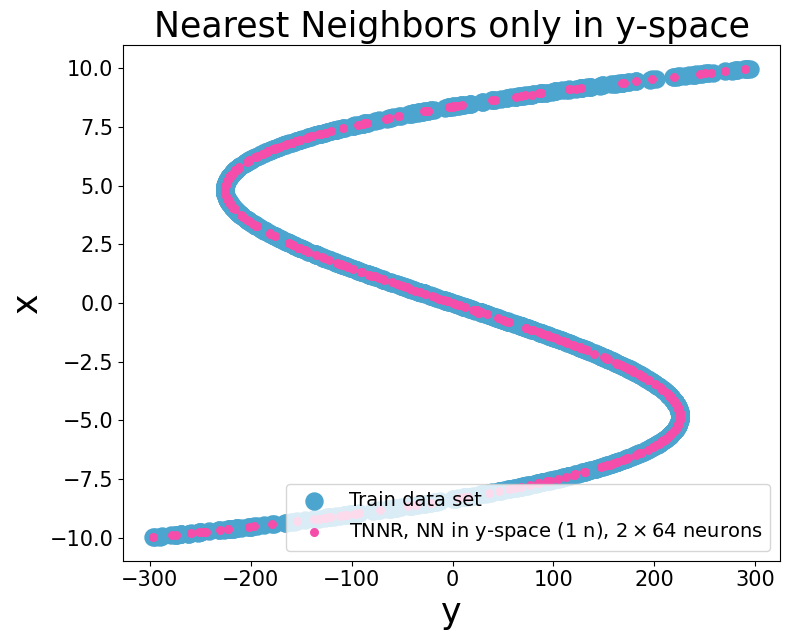

In [57]:
#plt.scatter(tnnr_nn_test_64_no_nn_1.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn_1.x_train_single),
#            tnnr_nn_test_64_no_nn_1.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_1.y_train_single),
#            label='Train data set', s=20, c='#4ca5cf')
#plt.scatter(tnnr_nn_test_64_no_nn_1.x_pred_test,
#            tnnr_nn_test_64_no_nn_1.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_1.y_test_single),
#            label='TNNR, NN in y-space (1 n), $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.scatter(tnnr_nn_test_64_no_nn_1.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_1.y_train_single),
            tnnr_nn_test_64_no_nn_1.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn_1.x_train_single),
            label='Train data set', s=150, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_no_nn_1.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_1.y_test_single),
            tnnr_nn_test_64_no_nn_1.x_pred_test,
            label='TNNR, NN in y-space (1 n), $2\\times 64$ neurons', s=30, c='#f54eaa')

plt.title('Nearest Neighbors only in y-space', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('no-nn-no-noise-1n.pdf')

### Versión con NN en y-space y x-space y todo el proceso

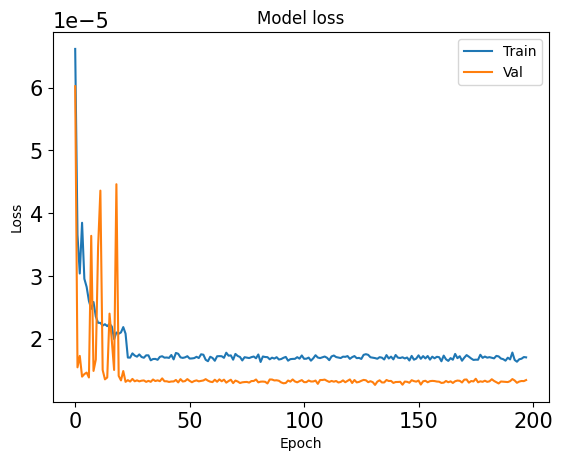

Test RMSE (plain):                                6.488487413995044
Test RMSE (back to y-space):                      0.4201378879575993
Test RMSE (min among clusters):                   5.560592456624881
Test RMSE (transformed back):                     6.488487413995043
Test RMSE (min among clusters, transformed back): 5.560592456624881
CPU times: user 6min 53s, sys: 3min 20s, total: 10min 13s
Wall time: 3min 40s


In [58]:
%%time

tnnr_nn_test_64_no_noise = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                   show_summary=False, show_loss_plot=True, show_rmse=True, 
                                   mdl_wts_file='weights/tnnr_nn_test_64_no_noise_n' + str(n) + '_inverse_a' + str(a),
                                   num_nn_train=10,
                                   num_nn_test=2,
                                   radius_nn_predict=0.0001,
                                   radius_sub_nn_predict=0.00005)

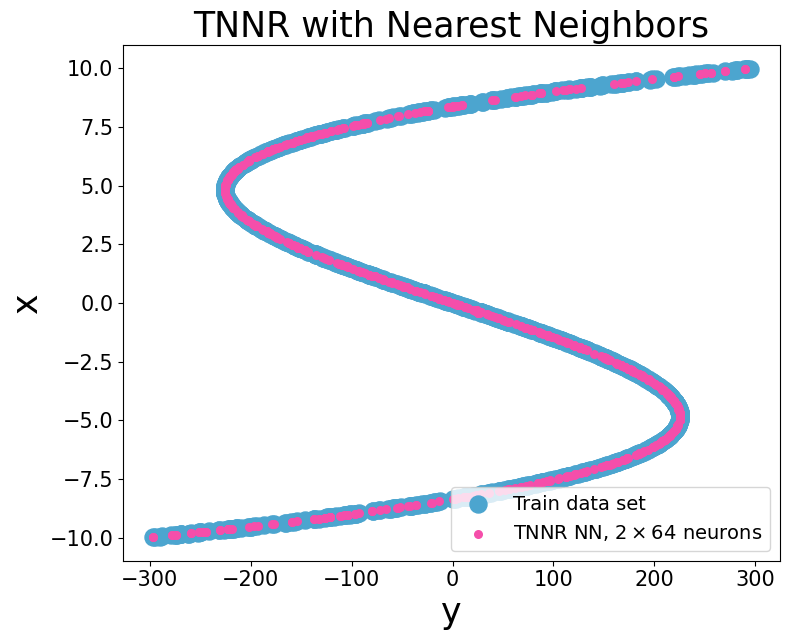

In [59]:
#plt.scatter(tnnr_nn_test_64_no_noise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_noise.x_train_single),
#            tnnr_nn_test_64_no_noise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_noise.y_train_single),
#            label='Train data set', s=20, c='#4ca5cf')
#plt.scatter(tnnr_nn_test_64_no_noise.x_pred_test,
#            tnnr_nn_test_64_no_noise.y_pred_test,
#            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.scatter(tnnr_nn_test_64_no_noise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_noise.y_train_single),
            tnnr_nn_test_64_no_noise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_noise.x_train_single),
            label='Train data set', s=150, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_no_noise.y_pred_test,
            tnnr_nn_test_64_no_noise.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=30, c='#f54eaa')

plt.title('TNNR with Nearest Neighbors', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-no-noise.pdf')

## With uniform noise

### Solo TNNR

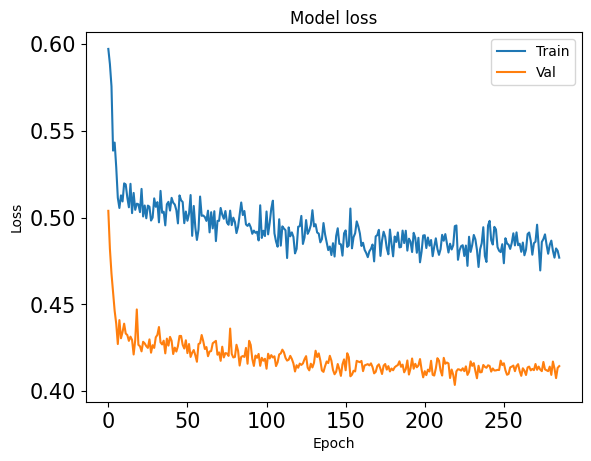

Test RMSE (plain):           5.139402815597726
Test RMSE (back to y-space): 7.195915280805289
CPU times: user 6min 24s, sys: 1min 1s, total: 7min 26s
Wall time: 5min 4s


In [60]:
%%time

tnnr_test_64_unoise = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                           show_summary=False, show_loss_plot=True, show_rmse=True, 
                           mdl_wts_file='weights/tnnr_test_64_n' + str(n) + '_inverse_a' + str(a),
                           noise_range_y=(-20, 20))

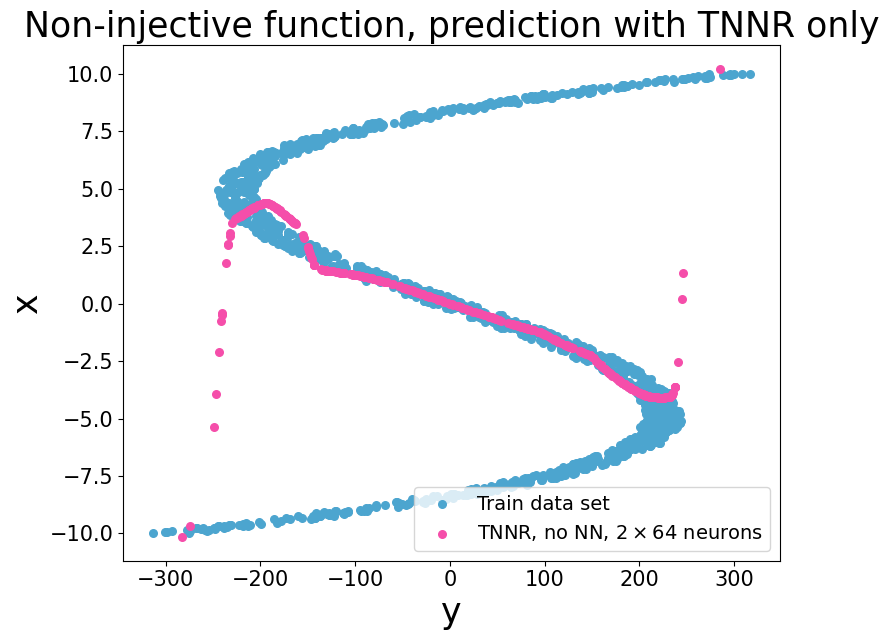

In [61]:
#plt.scatter(tnnr_test_64_unoise.cn_transformer.inverse_transform_x(tnnr_test_64_unoise.x_train_single),
#            tnnr_test_64_unoise.cn_transformer.inverse_transform_y(tnnr_test_64_unoise.y_train_single),
#            label='Train data set', s=10, c='#4ca5cf')
#plt.scatter(tnnr_test_64_unoise.x_pred_test,
#            tnnr_test_64_unoise.cn_transformer.inverse_transform_y(tnnr_test_64_unoise.y_test_single),
#            label='TNNR, no NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.scatter(tnnr_test_64_unoise.cn_transformer.inverse_transform_y(tnnr_test_64_unoise.y_train_single),
            tnnr_test_64_unoise.cn_transformer.inverse_transform_x(tnnr_test_64_unoise.x_train_single),
            label='Train data set', s=30, c='#4ca5cf')
plt.scatter(tnnr_test_64_unoise.cn_transformer.inverse_transform_y(tnnr_test_64_unoise.y_test_single),
            tnnr_test_64_unoise.x_pred_test,
            label='TNNR, no NN, $2\\times 64$ neurons', s=30, c='#f54eaa')

#plt.xlim([-10, 10])
plt.title('Non-injective function, prediction with TNNR only', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-only-unoise.pdf')

### Primera version de TNNR NN (solo en y-space)

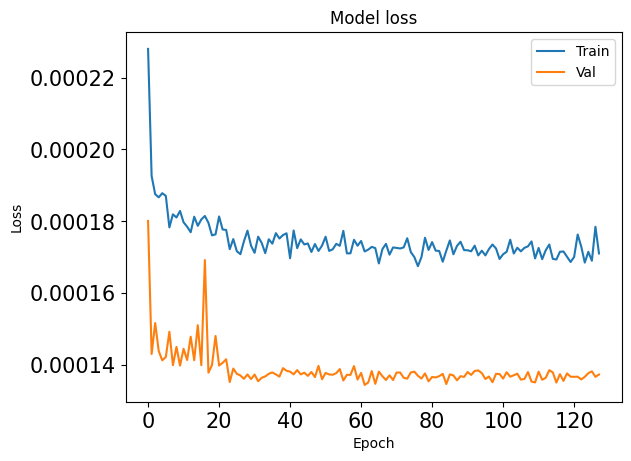

Test RMSE (plain):              5.974077625049959
Test RMSE (back to y-space):    150.4202928111102
CPU times: user 2min 52s, sys: 27.3 s, total: 3min 19s
Wall time: 2min 16s


In [62]:
%%time

tnnr_nn_test_64_no_nn_unoise = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                       show_summary=False, show_loss_plot=True, show_rmse=True, 
                                       mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                       num_nn_train=30,
                                       num_nn_test=2,
                                       no_use_nn=True,
                                       noise_range_y=(-20, 20))

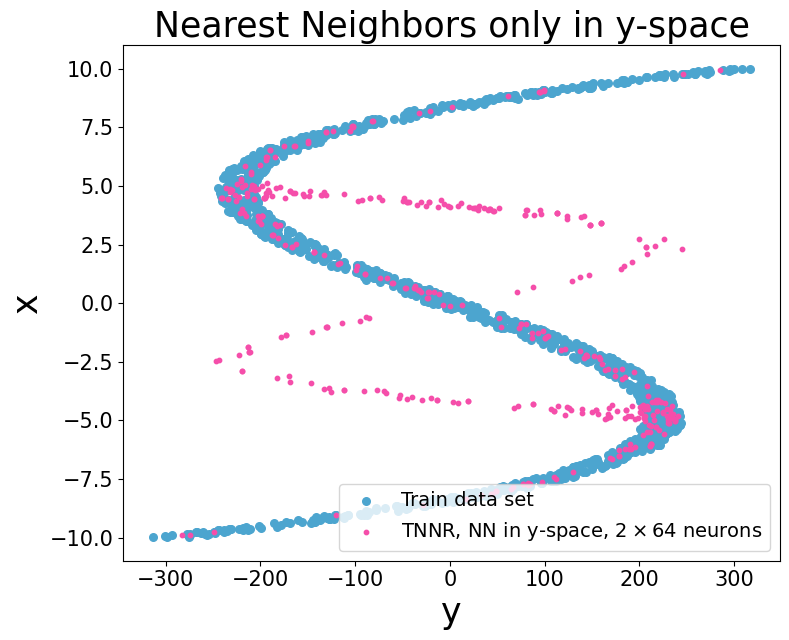

In [63]:
#plt.scatter(tnnr_nn_test_64_no_nn_unoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn_unoise.x_train_single),
#            tnnr_nn_test_64_no_nn_unoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_unoise.y_train_single),
#            label='Train data set', s=10, c='#4ca5cf')
#plt.scatter(tnnr_nn_test_64_no_nn_unoise.x_pred_test,
#            tnnr_nn_test_64_no_nn_unoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_unoise.y_test_single),
#            label='TNNR, NN in y-space, $2\\times 64$ neurons', s=5, c='#f54eaa')

plt.scatter(tnnr_nn_test_64_no_nn_unoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_unoise.y_train_single),
            tnnr_nn_test_64_no_nn_unoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn_unoise.x_train_single),
            label='Train data set', s=30, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_no_nn_unoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_unoise.y_test_single),
            tnnr_nn_test_64_no_nn_unoise.x_pred_test,
            label='TNNR, NN in y-space, $2\\times 64$ neurons', s=10, c='#f54eaa')

plt.title('Nearest Neighbors only in y-space', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('no-nn-unoise.pdf')

### Versión con NN en y-space y x-space y todo el proceso

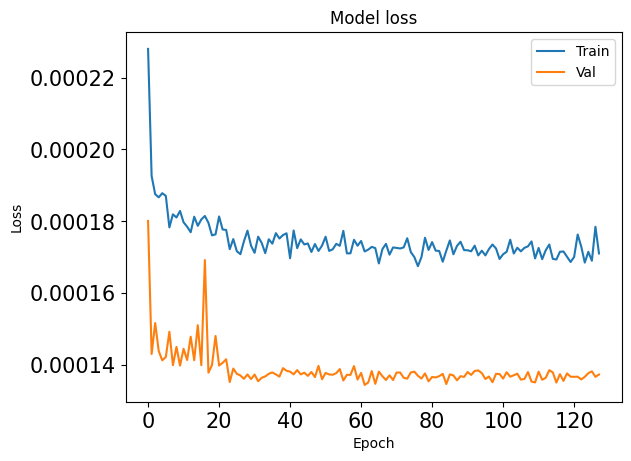

Test RMSE (plain):                                6.79368144656696
Test RMSE (back to y-space):                      14.80403728504425
Test RMSE (min among clusters):                   5.860556098357205
Test RMSE (transformed back):                     6.79368144656696
Test RMSE (min among clusters, transformed back): 5.860556098357206
CPU times: user 6min 50s, sys: 4min 22s, total: 11min 12s
Wall time: 2min 47s


In [64]:
%%time

tnnr_nn_test_64_unoise = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                 show_summary=False, show_loss_plot=True, show_rmse=True, 
                                 mdl_wts_file='weights/tnnr_nn_test_64_no_noise_n' + str(n) + '_inverse_a' + str(a),
                                 num_nn_train=30,
                                 num_nn_test=2,
                                 radius_nn_predict=0.001,
                                 radius_sub_nn_predict=0.0005,
                                 noise_range_y=(-20, 20))

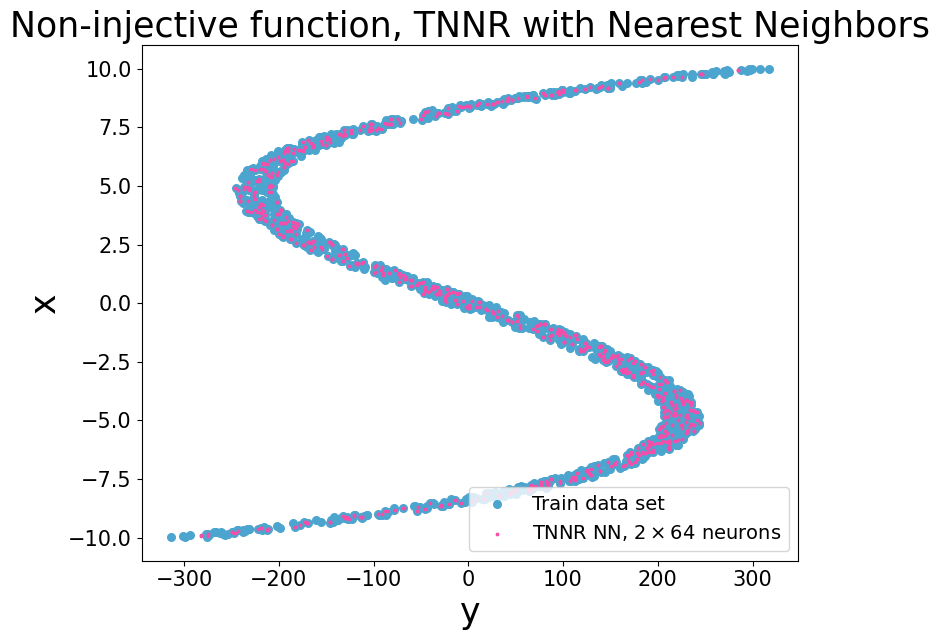

In [65]:
#plt.scatter(tnnr_nn_test_64_unoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_unoise.x_train_single),
#            tnnr_nn_test_64_unoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_unoise.y_train_single),
#            label='Train data set', s=20, c='#4ca5cf')
#plt.scatter(tnnr_nn_test_64_unoise.x_pred_test,
#            tnnr_nn_test_64_unoise.y_pred_test,
#            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.scatter(tnnr_nn_test_64_unoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_unoise.y_train_single),
            tnnr_nn_test_64_unoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_unoise.x_train_single),
            label='Train data set', s=30, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_unoise.y_pred_test,
            tnnr_nn_test_64_unoise.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.title('Non-injective function, TNNR with Nearest Neighbors', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-unoise.pdf')

## With gaussian noise

### Solo TNNR

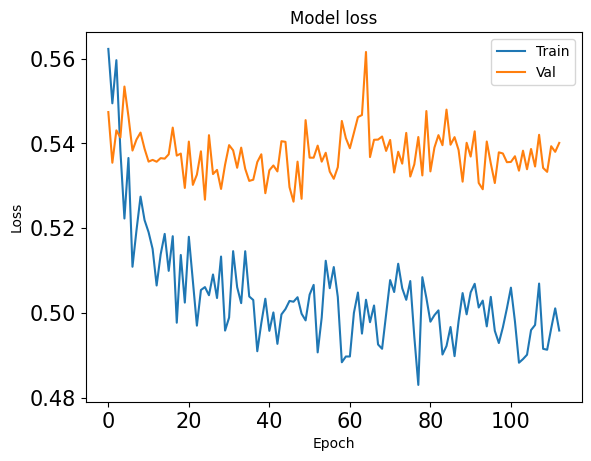

Test RMSE (plain):           5.165148088884388
Test RMSE (back to y-space): 8.877135175303042
CPU times: user 2min 47s, sys: 27.5 s, total: 3min 14s
Wall time: 2min 13s


In [66]:
%%time

tnnr_test_64_gnoise = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                           show_summary=False, show_loss_plot=True, show_rmse=True, 
                           mdl_wts_file='weights/tnnr_test_64_n' + str(n) + '_inverse_a' + str(a),
                           noise_normal_y=(0, 20))

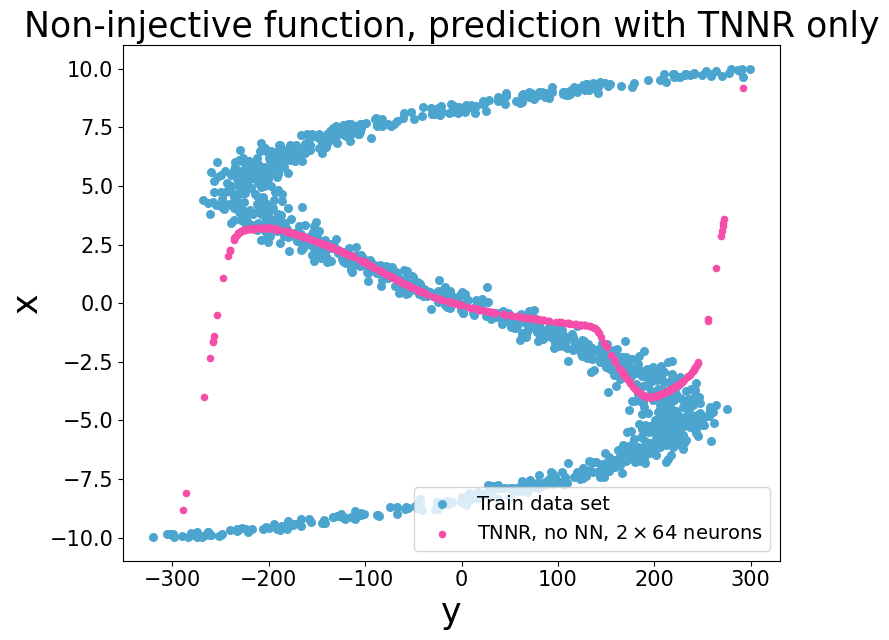

In [67]:
#plt.scatter(tnnr_test_64_gnoise.cn_transformer.inverse_transform_x(tnnr_test_64_gnoise.x_train_single),
#            tnnr_test_64_gnoise.cn_transformer.inverse_transform_y(tnnr_test_64_gnoise.y_train_single),
#            label='Train data set', s=10, c='#4ca5cf')
#plt.scatter(tnnr_test_64_gnoise.x_pred_test,
#            tnnr_test_64_gnoise.cn_transformer.inverse_transform_y(tnnr_test_64_gnoise.y_test_single),
#            label='TNNR, no NN, $2\\times 64$ neurons', s=6, c='#f54eaa')

plt.scatter(tnnr_test_64_gnoise.cn_transformer.inverse_transform_y(tnnr_test_64_gnoise.y_train_single),
            tnnr_test_64_gnoise.cn_transformer.inverse_transform_x(tnnr_test_64_gnoise.x_train_single),
            label='Train data set', s=30, c='#4ca5cf')
plt.scatter(tnnr_test_64_gnoise.cn_transformer.inverse_transform_y(tnnr_test_64_gnoise.y_test_single),
            tnnr_test_64_gnoise.x_pred_test,
            label='TNNR, no NN, $2\\times 64$ neurons', s=20, c='#f54eaa')

#plt.xlim([-10, 10])
plt.title('Non-injective function, prediction with TNNR only', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-only-gnoise.pdf')

### Primera version de TNNR NN (solo en y-space)

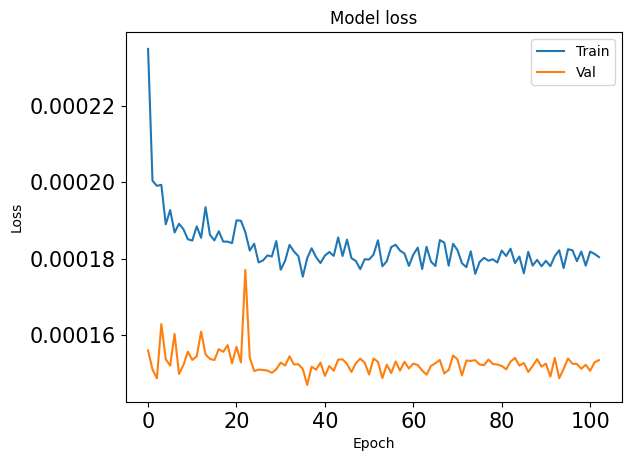

Test RMSE (plain):              5.5039941227634985
Test RMSE (back to y-space):    127.15040669244192
CPU times: user 2min 21s, sys: 21.6 s, total: 2min 43s
Wall time: 1min 53s


In [68]:
%%time

tnnr_nn_test_64_no_nn_gnoise = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                       show_summary=False, show_loss_plot=True, show_rmse=True, 
                                       mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                       num_nn_train=30,
                                       num_nn_test=6,
                                       no_use_nn=True, # Primera version de TNNR NN (solo en y-space)
                                       noise_normal_y=(0, 20))

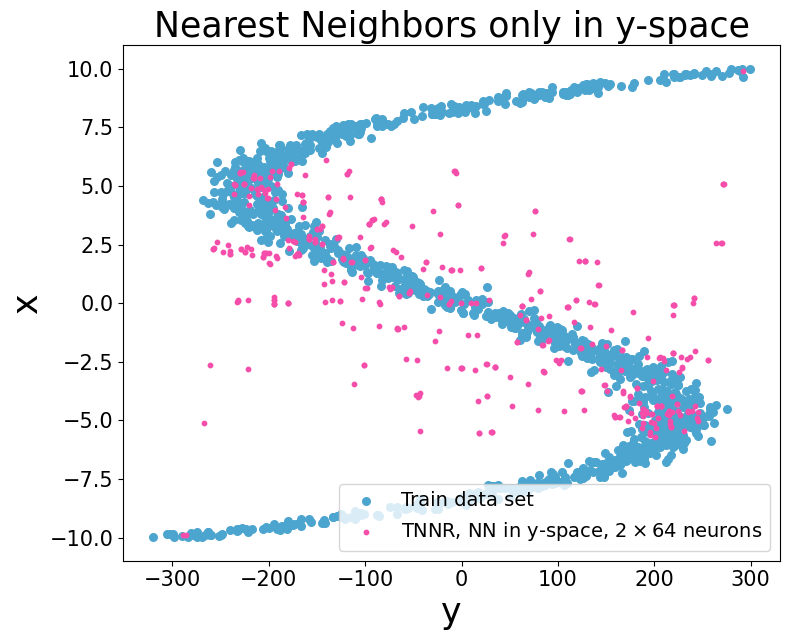

In [69]:
#plt.scatter(tnnr_nn_test_64_no_nn_gnoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn_gnoise.x_train_single),
#            tnnr_nn_test_64_no_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_gnoise.y_train_single),
#            label='Train data set', s=10, c='#4ca5cf')
#plt.scatter(tnnr_nn_test_64_no_nn_gnoise.x_pred_test,
#            tnnr_nn_test_64_no_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_gnoise.y_test_single),
#            label='TNNR, NN in y-space, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.scatter(tnnr_nn_test_64_no_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_gnoise.y_train_single),
            tnnr_nn_test_64_no_nn_gnoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_no_nn_gnoise.x_train_single),
            label='Train data set', s=30, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_no_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn_gnoise.y_test_single),
            tnnr_nn_test_64_no_nn_gnoise.x_pred_test,
            label='TNNR, NN in y-space, $2\\times 64$ neurons', s=10, c='#f54eaa')

plt.title('Nearest Neighbors only in y-space', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('no-nn-gnoise.pdf')

### Versión con NN en y-space y x-space y todo el proceso

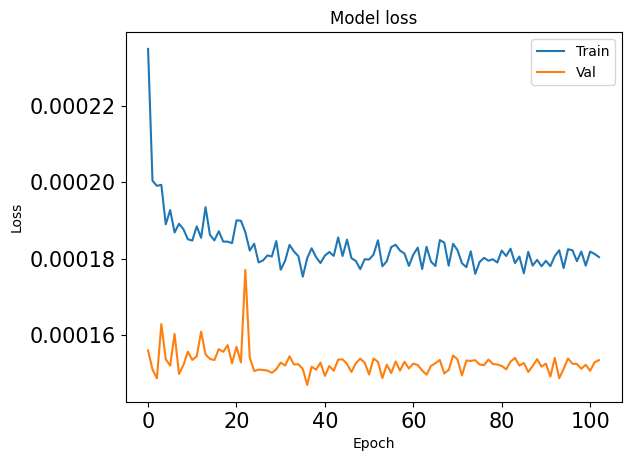

Test RMSE (plain):                                7.209941583069917
Test RMSE (back to y-space):                      25.926884071194046
Test RMSE (min among clusters):                   4.505456808606511
Test RMSE (transformed back):                     7.209941583069917
Test RMSE (min among clusters, transformed back): 4.505456808606511
CPU times: user 14min 15s, sys: 11min 50s, total: 26min 6s
Wall time: 3min 45s


In [70]:
%%time

tnnr_nn_test_64_nn_gnoise = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                    show_summary=False, show_loss_plot=True, show_rmse=True, 
                                    mdl_wts_file='weights/tnnr_nn_test_64_n' + str(n) + '_inverse_a' + str(a),
                                    num_nn_train=30,
                                    num_nn_test=6,
                                    radius_nn_predict=0.001,
                                    radius_sub_nn_predict=0.0005,
                                    noise_normal_y=(0, 20))

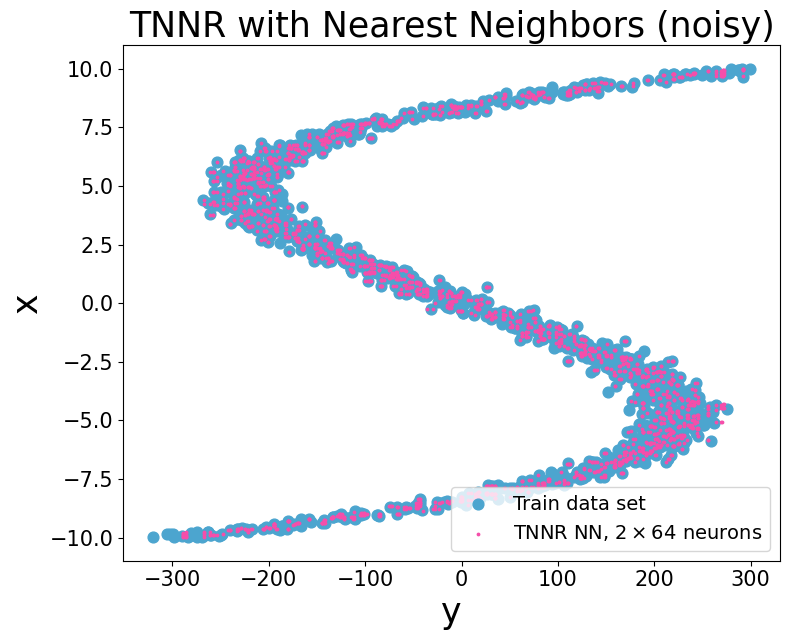

In [93]:
#plt.scatter(tnnr_nn_test_64_nn_gnoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_nn_gnoise.x_train_single),
#            tnnr_nn_test_64_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_nn_gnoise.y_train_single),
#            label='Train data set', s=10, c='#4ca5cf')
#plt.scatter(tnnr_nn_test_64_nn_gnoise.x_pred_test,
#            tnnr_nn_test_64_nn_gnoise.y_pred_test,
#            label='TNNR NN, $2\\times 64$ neurons', s=1, c='#f54eaa')

plt.scatter(tnnr_nn_test_64_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_test_64_nn_gnoise.y_train_single),
            tnnr_nn_test_64_nn_gnoise.cn_transformer.inverse_transform_x(tnnr_nn_test_64_nn_gnoise.x_train_single),
            label='Train data set', s=60, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_nn_gnoise.y_pred_test,
            tnnr_nn_test_64_nn_gnoise.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.title('TNNR with Nearest Neighbors (noisy)', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-gnoise.pdf')

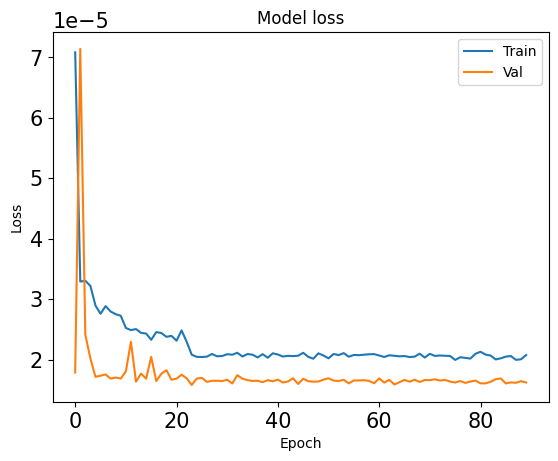

Test RMSE (plain):                                7.210083597990857
Test RMSE (back to y-space):                      26.09416234648781
Test RMSE (min among clusters):                   4.507008488531503
Test RMSE (transformed back):                     7.210083597990856
Test RMSE (min among clusters, transformed back): 4.507008488531503
CPU times: user 10min 31s, sys: 8min 30s, total: 19min 1s
Wall time: 2min 59s


In [72]:
%%time

tnnr_nn_test_64_nn_gnoise2 = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                     show_summary=False, show_loss_plot=True, show_rmse=True, 
                                     mdl_wts_file='weights/tnnr_nn_test_64_n' + str(n) + '_inverse_a' + str(a),
                                     num_nn_train=10,
                                     num_nn_test=6,
                                     radius_nn_predict=0.0001,
                                     radius_sub_nn_predict=0.00005,
                                     noise_normal_y=(0, 20))

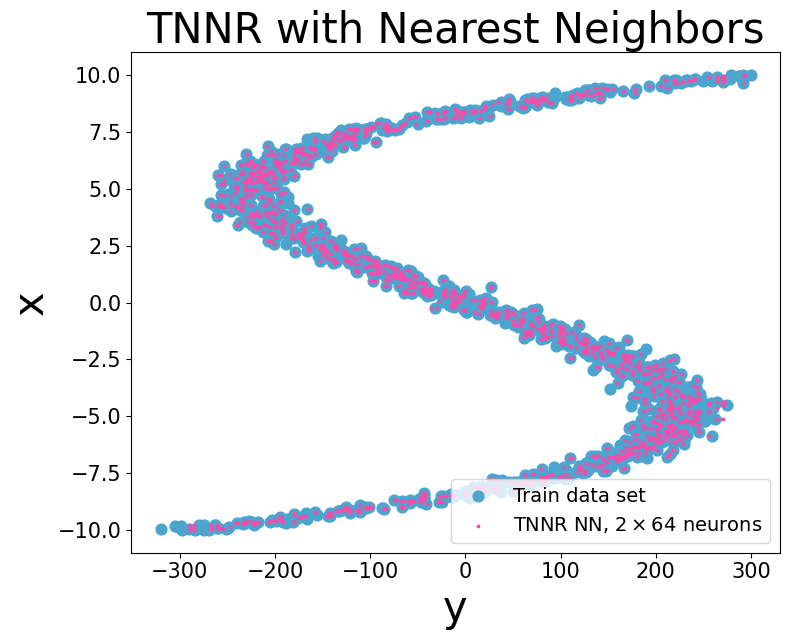

In [73]:
plt.scatter(tnnr_nn_test_64_nn_gnoise2.cn_transformer.inverse_transform_y(tnnr_nn_test_64_nn_gnoise2.y_train_single),
            tnnr_nn_test_64_nn_gnoise2.cn_transformer.inverse_transform_x(tnnr_nn_test_64_nn_gnoise2.x_train_single),
            label='Train data set', s=60, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_nn_gnoise2.y_pred_test,
            tnnr_nn_test_64_nn_gnoise2.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.title('TNNR with Nearest Neighbors', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-gnoise2.pdf')

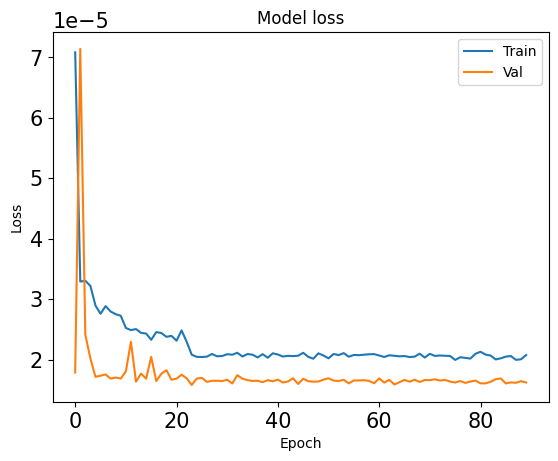

Test RMSE (plain):                                7.227232020269571
Test RMSE (back to y-space):                      26.032627767547737
Test RMSE (min among clusters):                   5.507044670160078
Test RMSE (transformed back):                     7.227232020269571
Test RMSE (min among clusters, transformed back): 5.507044670160078
CPU times: user 5min 32s, sys: 3min 41s, total: 9min 14s
Wall time: 2min 10s


In [74]:
%%time

tnnr_nn_test_64_nn_gnoise3 = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                     show_summary=False, show_loss_plot=True, show_rmse=True, 
                                     mdl_wts_file='weights/tnnr_nn_test_64_n' + str(n) + '_inverse_a' + str(a),
                                     num_nn_train=10,
                                     num_nn_test=3,
                                     radius_nn_predict=0.01,
                                     radius_sub_nn_predict=0.03,
                                     noise_normal_y=(0, 20))

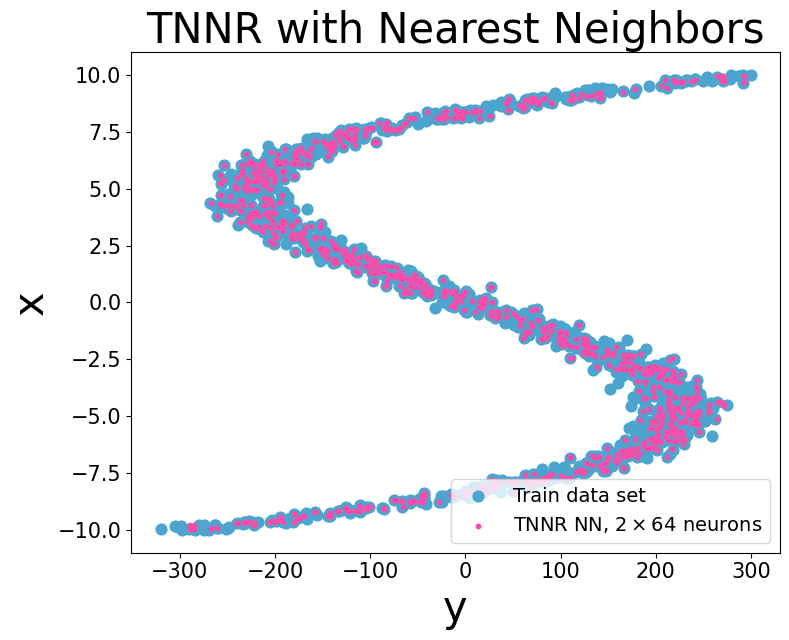

In [75]:
plt.scatter(tnnr_nn_test_64_nn_gnoise3.cn_transformer.inverse_transform_y(tnnr_nn_test_64_nn_gnoise3.y_train_single),
            tnnr_nn_test_64_nn_gnoise3.cn_transformer.inverse_transform_x(tnnr_nn_test_64_nn_gnoise3.x_train_single),
            label='Train data set', s=60, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_nn_gnoise3.y_pred_test,
            tnnr_nn_test_64_nn_gnoise3.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=10, c='#f54eaa')

plt.title('TNNR with Nearest Neighbors', fontsize = 30)
plt.xlabel('y', fontsize = 30)
plt.ylabel('x', fontsize = 30)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-gnoise2.pdf')

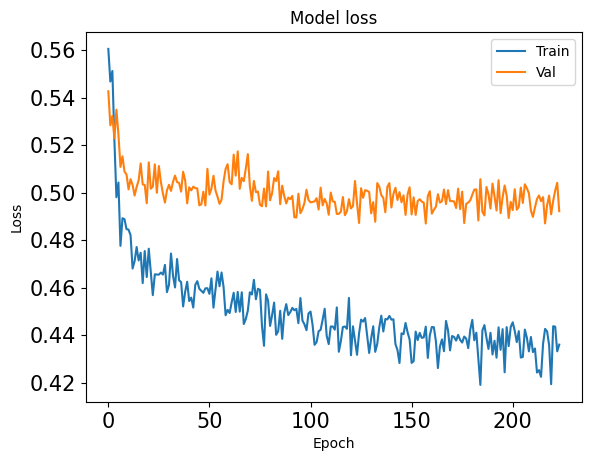

Test RMSE (plain):           4.908442126206994
Test RMSE (back to y-space): 6.822535106157275
CPU times: user 5min 6s, sys: 49.7 s, total: 5min 56s
Wall time: 4min 3s


In [76]:
%%time

tnnr_test_64_gnoise_s = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                             show_summary=False, show_loss_plot=True, show_rmse=True, 
                             mdl_wts_file='weights/tnnr_test_64_n' + str(n) + '_inverse_a' + str(a),
                             noise_normal_y=(0, 5))

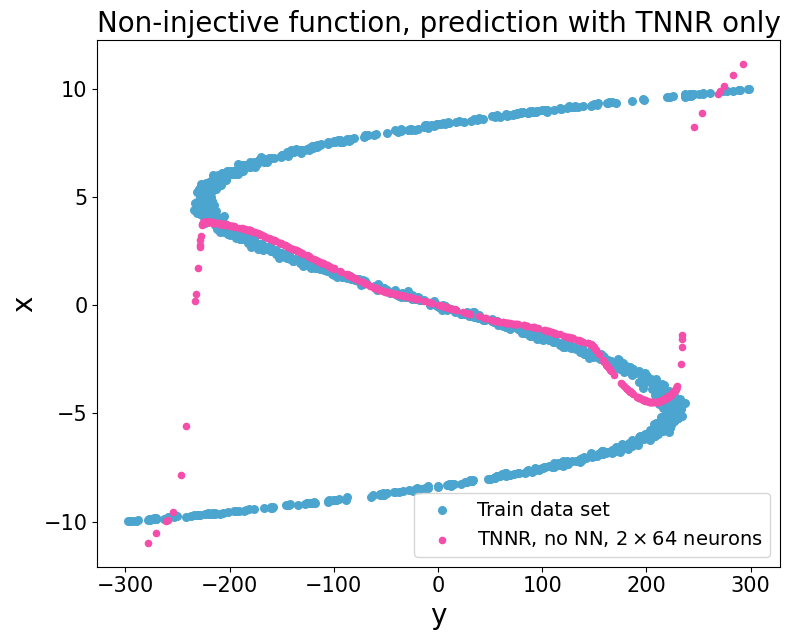

In [77]:
plt.scatter(tnnr_test_64_gnoise_s.cn_transformer.inverse_transform_y(tnnr_test_64_gnoise_s.y_train_single),
            tnnr_test_64_gnoise_s.cn_transformer.inverse_transform_x(tnnr_test_64_gnoise_s.x_train_single),
            label='Train data set', s=30, c='#4ca5cf')
plt.scatter(tnnr_test_64_gnoise_s.cn_transformer.inverse_transform_y(tnnr_test_64_gnoise_s.y_test_single),
            tnnr_test_64_gnoise_s.x_pred_test,
            label='TNNR, no NN, $2\\times 64$ neurons', s=20, c='#f54eaa')

#plt.xlim([-10, 10])
plt.title('Non-injective function, prediction with TNNR only', fontsize = 20)
plt.xlabel('y', fontsize = 20)
plt.ylabel('x', fontsize = 20)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-only-gnoise-s.pdf')

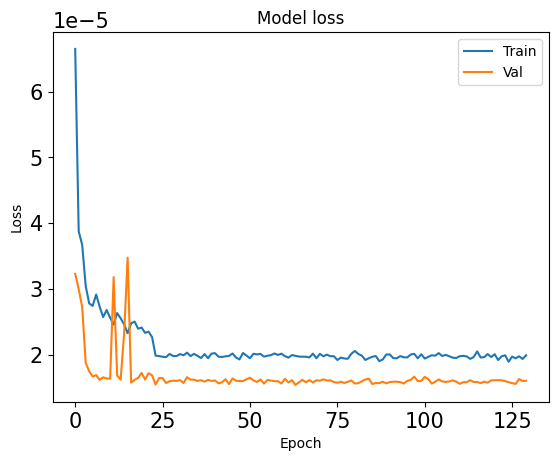

Test RMSE (plain):                                6.96422578975204
Test RMSE (back to y-space):                      6.732692711796549
Test RMSE (min among clusters):                   5.00359909748158
Test RMSE (transformed back):                     6.964225789752038
Test RMSE (min among clusters, transformed back): 5.00359909748158
CPU times: user 10min 51s, sys: 8min 12s, total: 19min 3s
Wall time: 3min 30s


In [78]:
%%time

tnnr_nn_test_64_nn_gnoise_s = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                      show_summary=False, show_loss_plot=True, show_rmse=True, 
                                      mdl_wts_file='weights/tnnr_nn_test_64_n' + str(n) + '_inverse_a' + str(a),
                                      num_nn_train=10,
                                      num_nn_test=4,
                                      radius_nn_predict=0.001,
                                      radius_sub_nn_predict=0.0005,
                                      noise_normal_y=(0, 5))

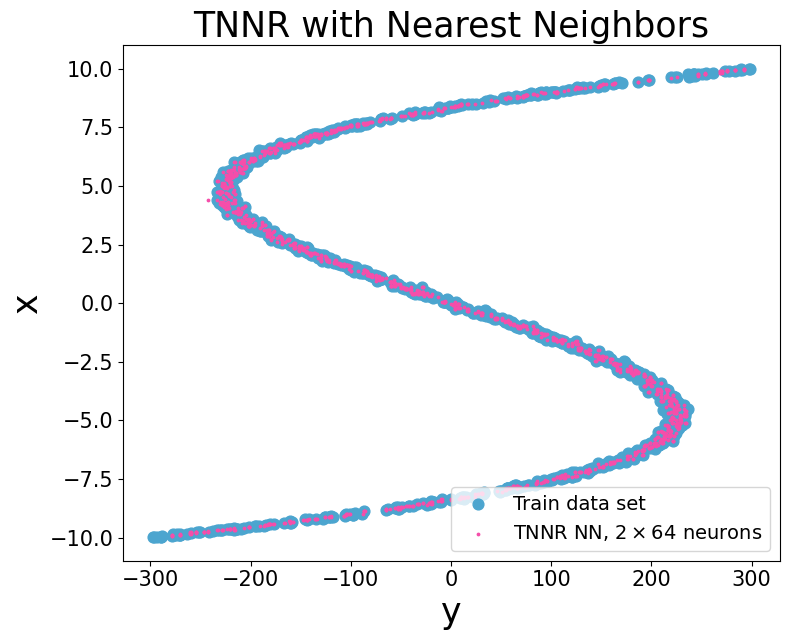

In [79]:
plt.scatter(tnnr_nn_test_64_nn_gnoise_s.cn_transformer.inverse_transform_y(tnnr_nn_test_64_nn_gnoise_s.y_train_single),
            tnnr_nn_test_64_nn_gnoise_s.cn_transformer.inverse_transform_x(tnnr_nn_test_64_nn_gnoise_s.x_train_single),
            label='Train data set', s=60, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_nn_gnoise_s.y_pred_test,
            tnnr_nn_test_64_nn_gnoise_s.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.title('TNNR with Nearest Neighbors', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-gnoise-s.pdf')

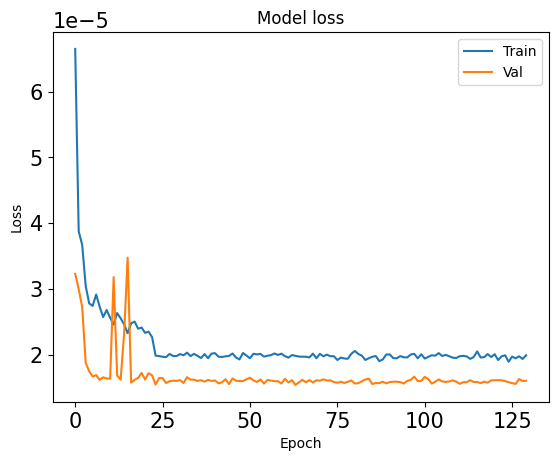

Test RMSE (plain):                                6.956068492036819
Test RMSE (back to y-space):                      7.080510373279448
Test RMSE (min among clusters):                   4.653360161146046
Test RMSE (transformed back):                     6.956068492036819
Test RMSE (min among clusters, transformed back): 4.653360161146046
CPU times: user 23min 58s, sys: 20min 37s, total: 44min 36s
Wall time: 5min 48s


In [80]:
%%time

tnnr_nn_test_64_nn_gnoise_s = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                      show_summary=False, show_loss_plot=True, show_rmse=True, 
                                      mdl_wts_file='weights/tnnr_nn_test_64_n' + str(n) + '_inverse_a' + str(a),
                                      num_nn_train=10,
                                      num_nn_test=5,
                                      radius_nn_predict=0.02,
                                      radius_sub_nn_predict=0.01,
                                      noise_normal_y=(0, 5))

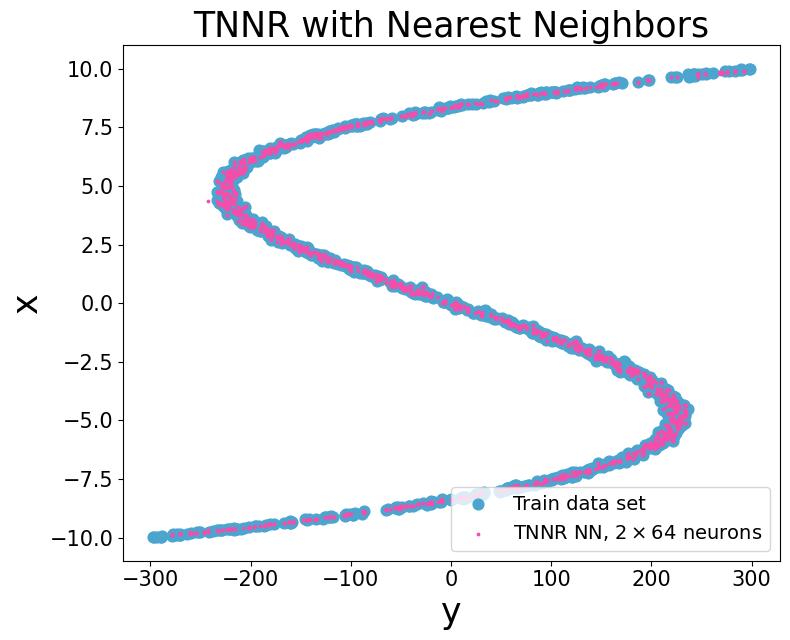

In [81]:
plt.scatter(tnnr_nn_test_64_nn_gnoise_s.cn_transformer.inverse_transform_y(tnnr_nn_test_64_nn_gnoise_s.y_train_single),
            tnnr_nn_test_64_nn_gnoise_s.cn_transformer.inverse_transform_x(tnnr_nn_test_64_nn_gnoise_s.x_train_single),
            label='Train data set', s=60, c='#4ca5cf')
plt.scatter(tnnr_nn_test_64_nn_gnoise_s.y_pred_test,
            tnnr_nn_test_64_nn_gnoise_s.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#f54eaa')

plt.title('TNNR with Nearest Neighbors', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-gnoise-s.pdf')

# Ejemplos de funciones de física

## Double-well potential $V(x)=\frac{1}{2}x^2+9e^{-x^2}$

In [82]:
def_func_double_well_pot = lambda x: 0.5*x**2 + 9*np.exp(-x**2)

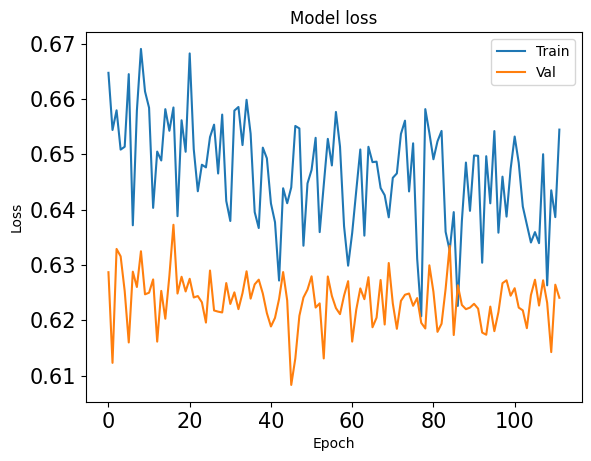

Test RMSE (plain):           5.863645584293064
Test RMSE (back to y-space): 4.374622681429229
CPU times: user 2min 48s, sys: 27.9 s, total: 3min 16s
Wall time: 2min 16s


In [83]:
%%time

tnnr_f1_64_gnoise = TNNR(def_func_double_well_pot, n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                           show_summary=False, show_loss_plot=True, show_rmse=True, 
                           mdl_wts_file='weights/tnnr_f1_64_n' + str(n) + '_inverse_a' + str(a),
                           noise_normal_y=(0, 0.5))

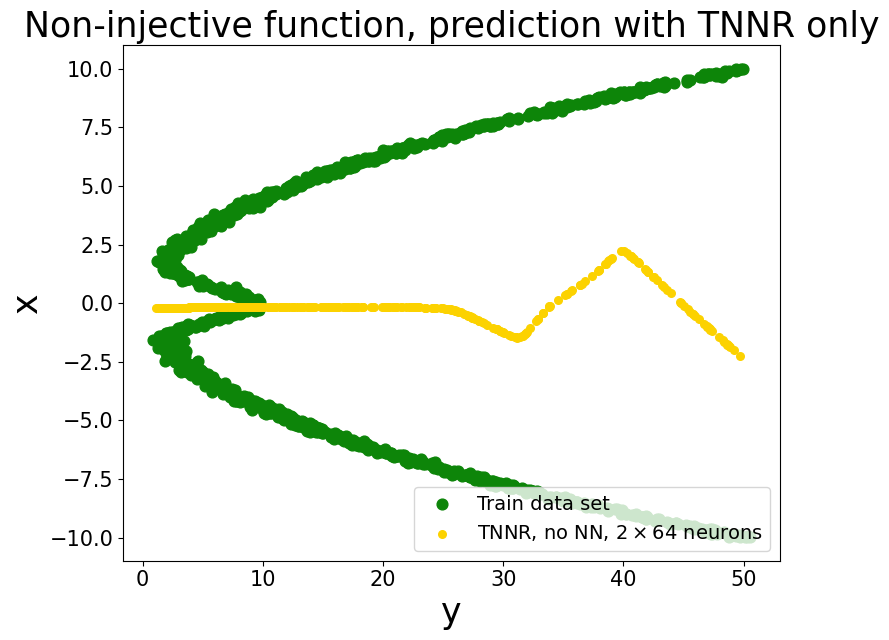

In [84]:
plt.scatter(tnnr_f1_64_gnoise.cn_transformer.inverse_transform_y(tnnr_f1_64_gnoise.y_train_single),
            tnnr_f1_64_gnoise.cn_transformer.inverse_transform_x(tnnr_f1_64_gnoise.x_train_single),
            label='Train data set', s=60, c='#0d8509')
plt.scatter(tnnr_f1_64_gnoise.cn_transformer.inverse_transform_y(tnnr_f1_64_gnoise.y_test_single),
            tnnr_f1_64_gnoise.x_pred_test,
            label='TNNR, no NN, $2\\times 64$ neurons', s=30, c='#fcd200')

#plt.xlim([-10, 10])
plt.title('Non-injective function, prediction with TNNR only', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-only-f1.pdf')

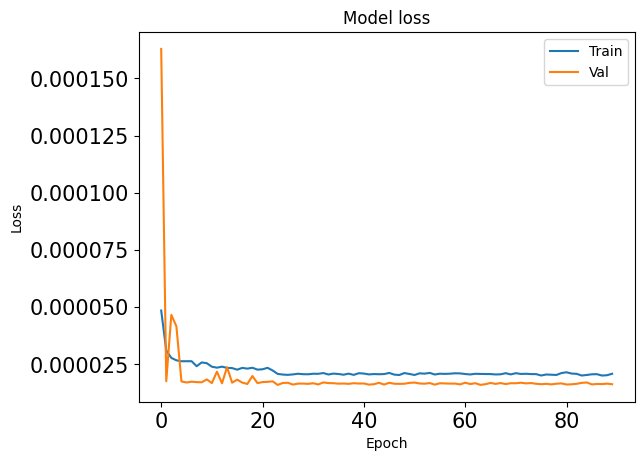

Test RMSE (plain):                                8.271227750907038
Test RMSE (back to y-space):                      0.6826589639557251
Test RMSE (min among clusters):                   5.522031026425112
Test RMSE (transformed back):                     8.271227750907036
Test RMSE (min among clusters, transformed back): 5.522031026425112
CPU times: user 7min 34s, sys: 5min 42s, total: 13min 17s
Wall time: 2min 26s


In [85]:
%%time

tnnr_nn_f1_64_nn_gnoise = TNNR_NN(def_func_double_well_pot, n=n, seed=seed, inverse_problem=True, 
                                  test_pct=0.2, val_pct=0.2,
                                  show_summary=False, show_loss_plot=True, show_rmse=True, 
                                  mdl_wts_file='weights/tnnr_nn_f1_64_n' + str(n) + '_inverse_a' + str(a),
                                  num_nn_train=10,
                                  num_nn_test=4,
                                  radius_nn_predict=0.0001,
                                  radius_sub_nn_predict=0.00005,
                                  noise_normal_y=(0, 0.5))

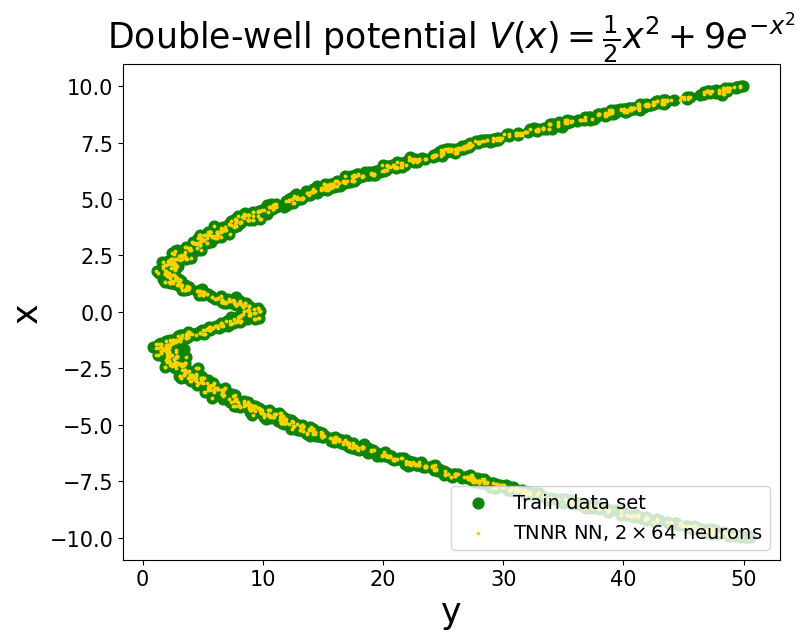

In [86]:
plt.scatter(tnnr_nn_f1_64_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_f1_64_nn_gnoise.y_train_single),
            tnnr_nn_f1_64_nn_gnoise.cn_transformer.inverse_transform_x(tnnr_nn_f1_64_nn_gnoise.x_train_single),
            label='Train data set', s=60, c='#0d8509')
plt.scatter(tnnr_nn_f1_64_nn_gnoise.y_pred_test,
            tnnr_nn_f1_64_nn_gnoise.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#fcd200')

plt.title('Double-well potential $V(x)=\\frac{1}{2}x^2+9e^{-x^2}$', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-f1-gnoise.pdf')

## Square of the refractive index $n^2(z)=1+0.2e^{-z^3}+0.4e^{-(z-2)^4}$

In [87]:
def_func_refractive_index = lambda z: 1 + 0.2*np.exp(-z**3) + 0.4*np.exp(-(z - 2)**4)

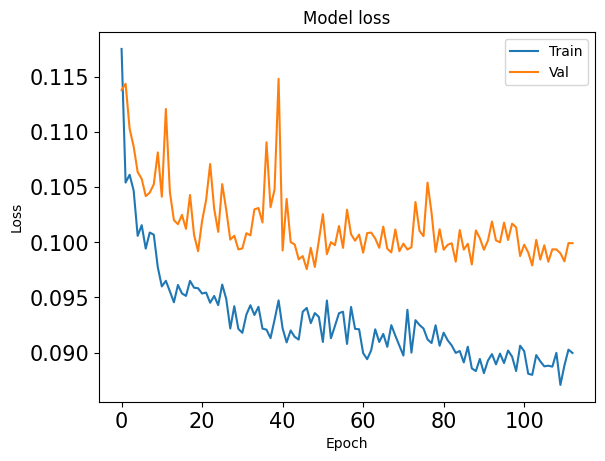

Test RMSE (plain):           0.6784368345513112
Test RMSE (back to y-space): 0.20814897413927336
CPU times: user 2min 49s, sys: 27.9 s, total: 3min 17s
Wall time: 2min 16s


In [88]:
%%time

tnnr_f2_64_gnoise = TNNR(def_func_refractive_index, n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                         show_summary=False, show_loss_plot=True, show_rmse=True, 
                         mdl_wts_file='weights/tnnr_f2_64_n' + str(n) + '_inverse_a' + str(a),
                         noise_normal_y=(0, 0.005),
                         range_data_gen=(0, 6))

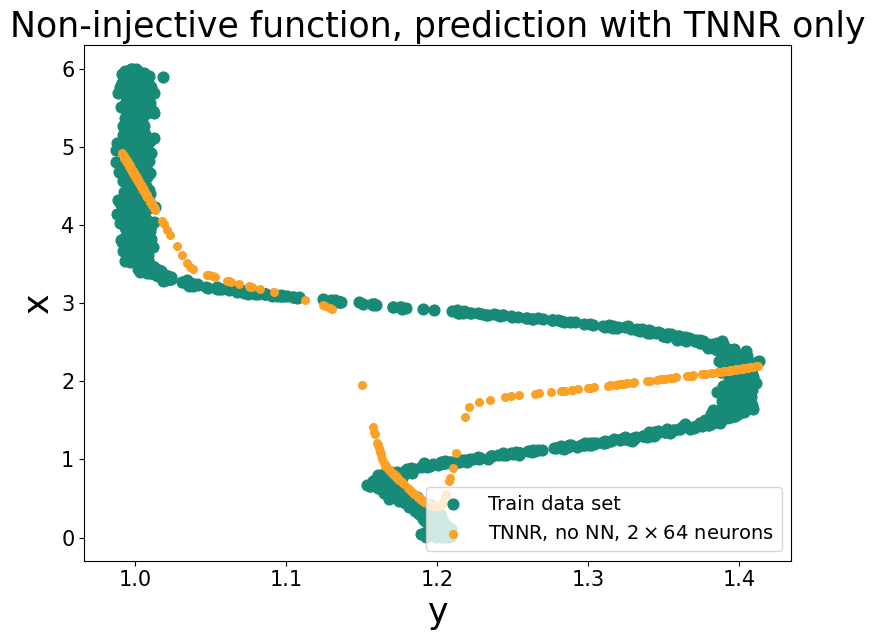

In [89]:
plt.scatter(tnnr_f2_64_gnoise.cn_transformer.inverse_transform_y(tnnr_f2_64_gnoise.y_train_single),
            tnnr_f2_64_gnoise.cn_transformer.inverse_transform_x(tnnr_f2_64_gnoise.x_train_single),
            label='Train data set', s=60, c='#178a78')
plt.scatter(tnnr_f2_64_gnoise.cn_transformer.inverse_transform_y(tnnr_f2_64_gnoise.y_test_single),
            tnnr_f2_64_gnoise.x_pred_test,
            label='TNNR, no NN, $2\\times 64$ neurons', s=30, c='#fca026')

#plt.xlim([-10, 10])
plt.title('Non-injective function, prediction with TNNR only', fontsize = 25)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-only-f2.pdf')

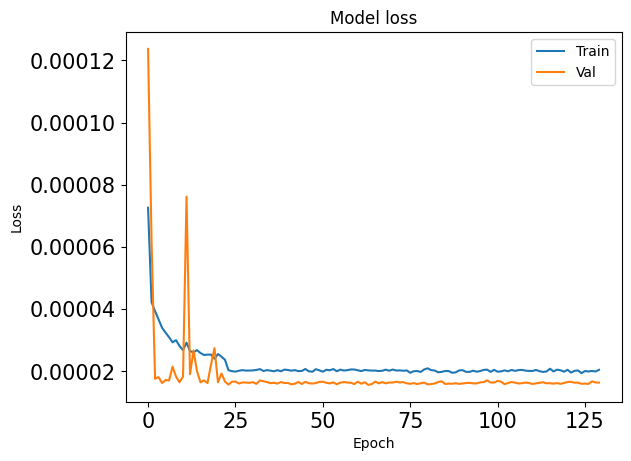

Test RMSE (plain):                                0.9212559739047992
Test RMSE (back to y-space):                      0.004952483801350896
Test RMSE (min among clusters):                   0.6487424064733687
Test RMSE (transformed back):                     0.9212559739047992
Test RMSE (min among clusters, transformed back): 0.6487424064733687
CPU times: user 8min 29s, sys: 6min, total: 14min 30s
Wall time: 3min 8s


In [90]:
%%time

tnnr_nn_f2_64_nn_gnoise = TNNR_NN(def_func_refractive_index, n=n, seed=seed, inverse_problem=True, 
                                  test_pct=0.2, val_pct=0.2,
                                  show_summary=False, show_loss_plot=True, show_rmse=True, 
                                  mdl_wts_file='weights/tnnr_nn_f2_64_n' + str(n) + '_inverse_a' + str(a),
                                  num_nn_train=10,
                                  num_nn_test=4,
                                  radius_nn_predict=0.0001,
                                  radius_sub_nn_predict=0.00005,
                                  noise_normal_y=(0, 0.005),
                                  range_data_gen=(0, 6))

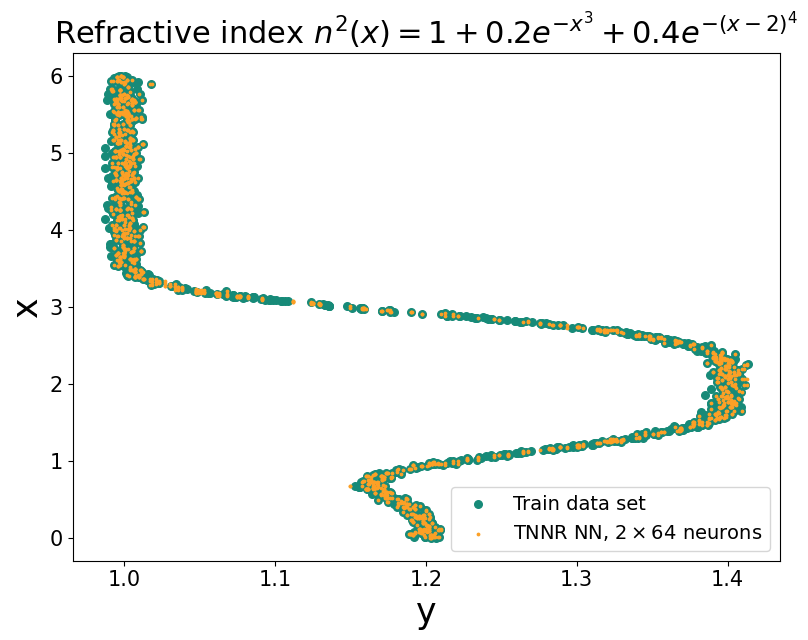

In [91]:
plt.scatter(tnnr_nn_f2_64_nn_gnoise.cn_transformer.inverse_transform_y(tnnr_nn_f2_64_nn_gnoise.y_train_single),
            tnnr_nn_f2_64_nn_gnoise.cn_transformer.inverse_transform_x(tnnr_nn_f2_64_nn_gnoise.x_train_single),
            label='Train data set', s=30, c='#178a78')
plt.scatter(tnnr_nn_f2_64_nn_gnoise.y_pred_test,
            tnnr_nn_f2_64_nn_gnoise.x_pred_test,
            label='TNNR NN, $2\\times 64$ neurons', s=3, c='#fca026')

plt.title('Refractive index $n^2(x)=1+0.2e^{-x^3}+0.4e^{-(x-2)^4}$', fontsize = 22)
plt.xlabel('y', fontsize = 25)
plt.ylabel('x', fontsize = 25)
plt.legend(loc='lower right', fontsize = 14)

plt.gca().figure.set_size_inches(8, 6.5)
plt.gca().figure.set_layout_engine('tight')
plt.savefig('tnnr-nn-f2-gnoise.pdf')